In [300]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

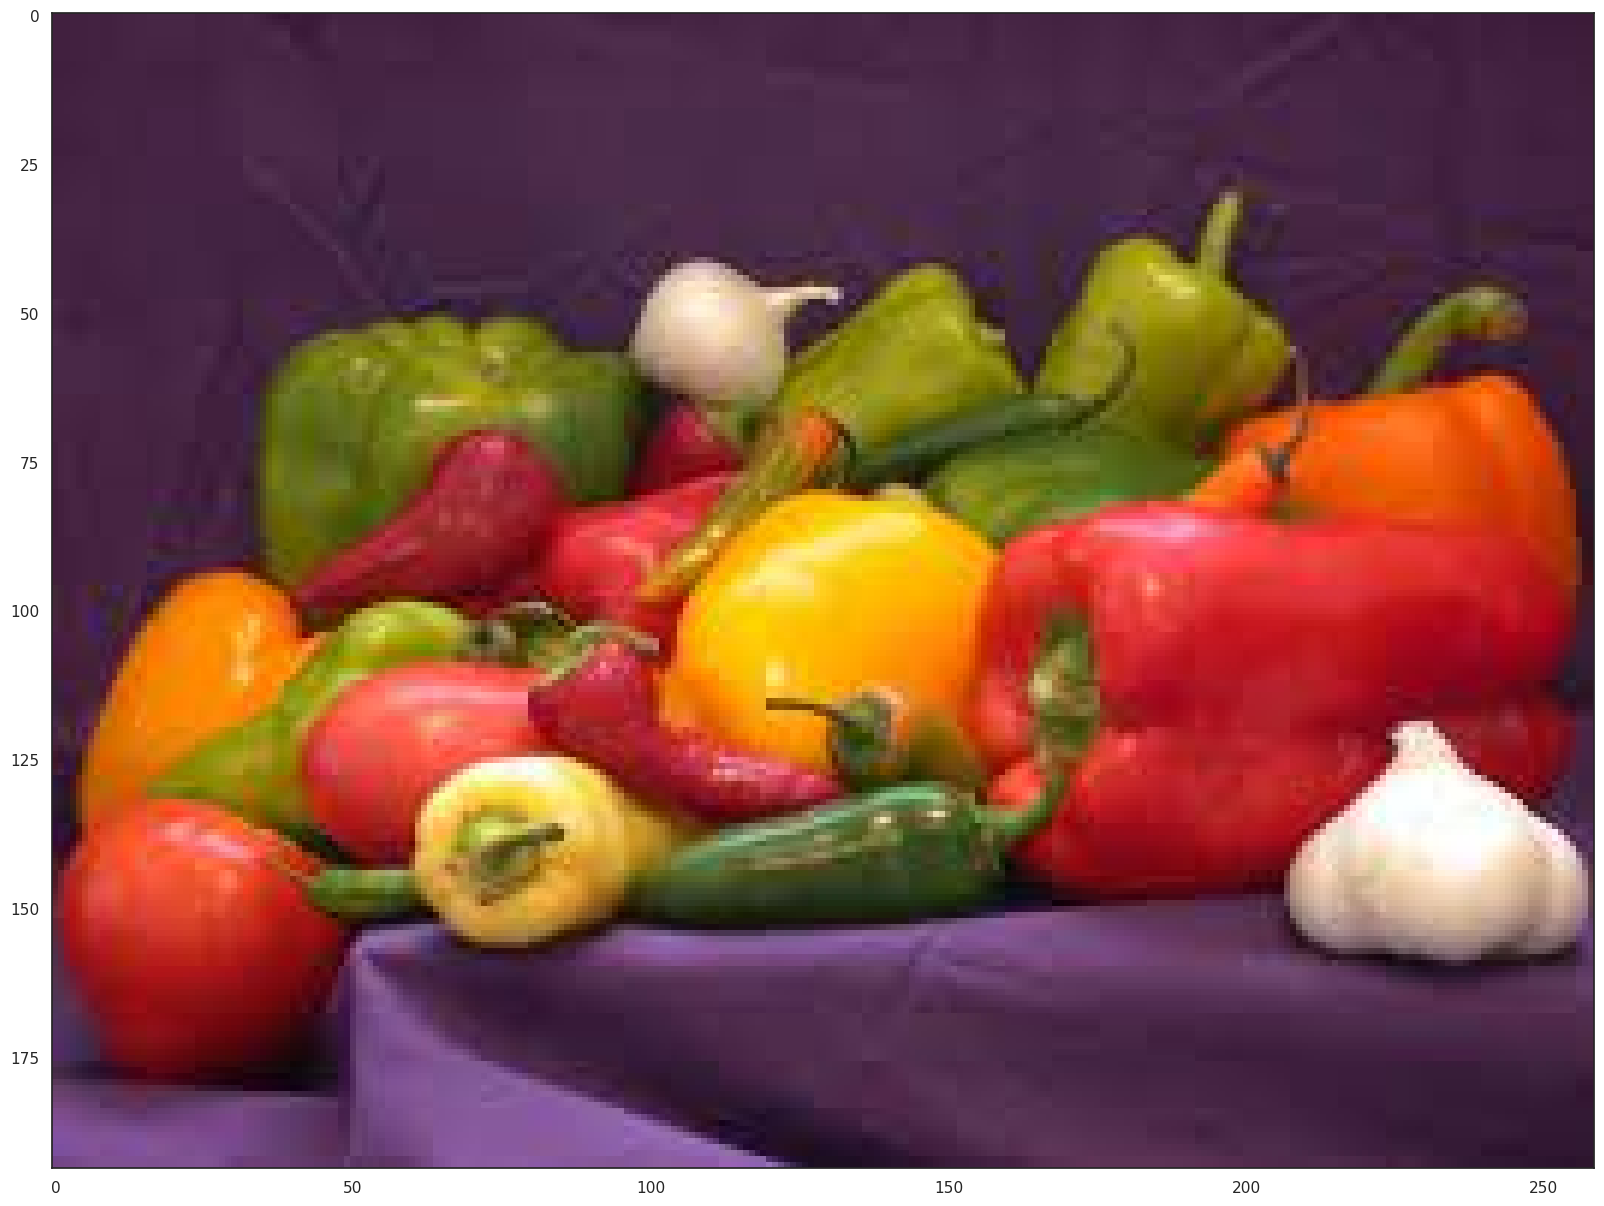

In [302]:
img = cv.imread('peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

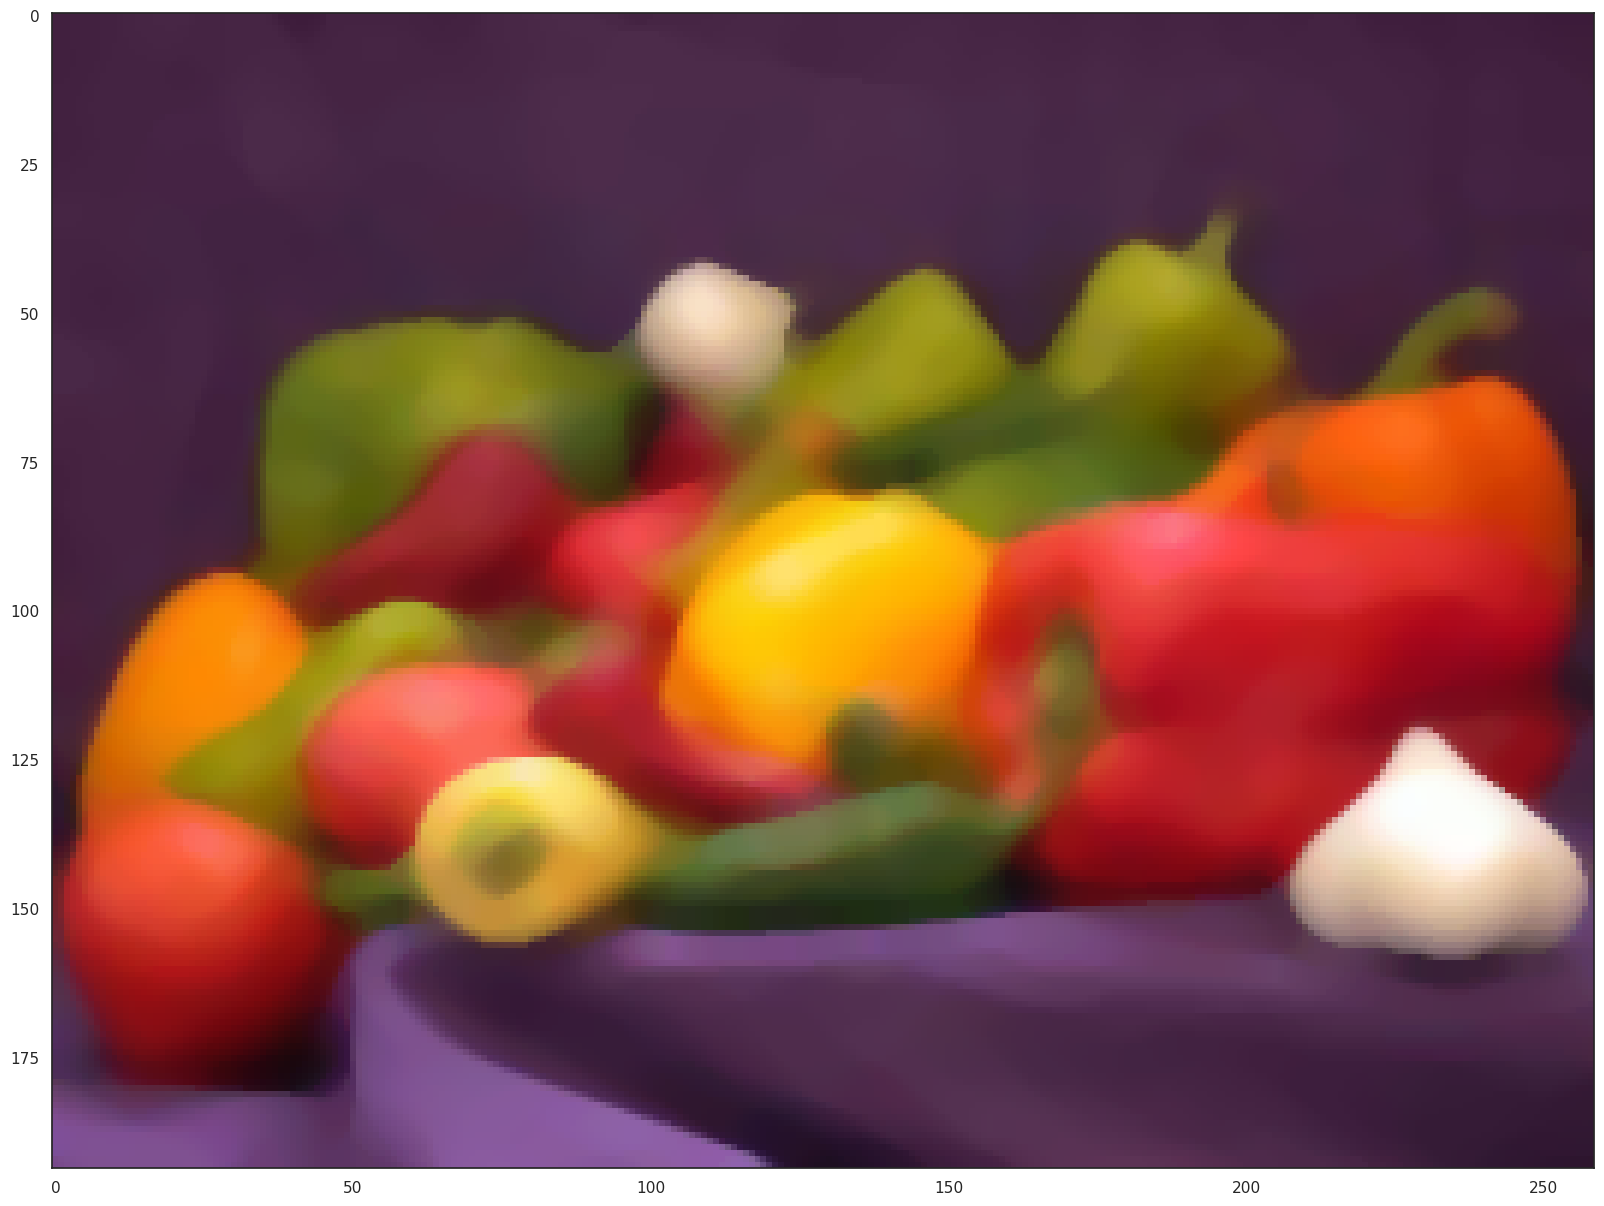

In [305]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

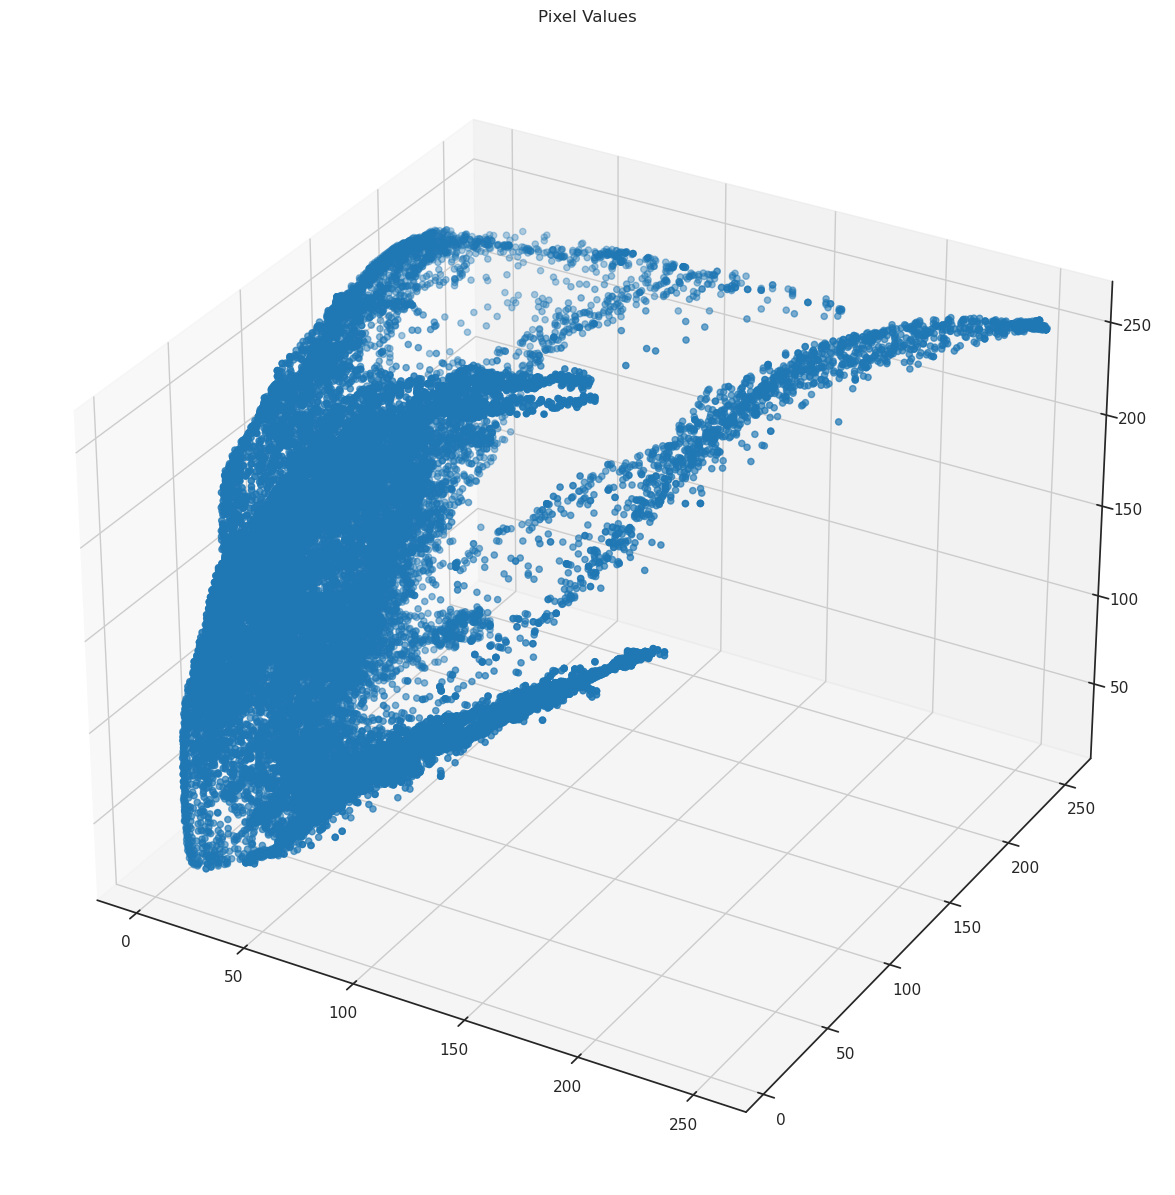

In [306]:
ax = plt.axes(projection = "3d")
ax.scatter3D(img[:,:,0], img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values')
plt.show()

In [307]:
img.shape

(194, 259, 3)

In [309]:
X = img.reshape((-1,3))
print("shape:", X.shape)
print("data type:",X.dtype)

shape: (50246, 3)
data type: uint8


In [310]:
X = np.float32(X)

In [311]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth

32.87326414201328

In [312]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=32.87326414201328, bin_seeding=True)

In [314]:
labeled = ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

In [317]:
clusters = ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [318]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [319]:
ms.cluster_centers_

array([[ 67.215485 ,  38.003654 ,  70.2382   ],
       [ 32.62928  ,  30.105581 , 174.10031  ],
       [ 25.785892 ,  93.40063  ,  97.28495  ],
       [ 25.484024 , 129.88284  , 141.96095  ],
       [123.167435 ,  70.76927  , 112.97448  ],
       [ 17.482222 ,  88.13475  , 226.18465  ],
       [  8.2336445, 138.10875  , 245.10875  ],
       [  8.67767  , 182.72815  , 251.8534   ],
       [158.85141  , 186.18875  , 217.99397  ],
       [180.72073  , 207.4579   , 235.84189  ],
       [238.62334  , 246.04509  , 251.51724  ],
       [ 84.24269  , 212.75731  , 248.8041   ]], dtype=float32)

In [320]:
cluster_int8 = np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  38,  70],
       [ 32,  30, 174],
       [ 25,  93,  97],
       [ 25, 129, 141],
       [123,  70, 112],
       [ 17,  88, 226],
       [  8, 138, 245],
       [  8, 182, 251],
       [158, 186, 217],
       [180, 207, 235],
       [238, 246, 251],
       [ 84, 212, 248]], dtype=uint8)

In [321]:
ms.predict(X)


array([0, 0, 0, ..., 0, 0, 0])

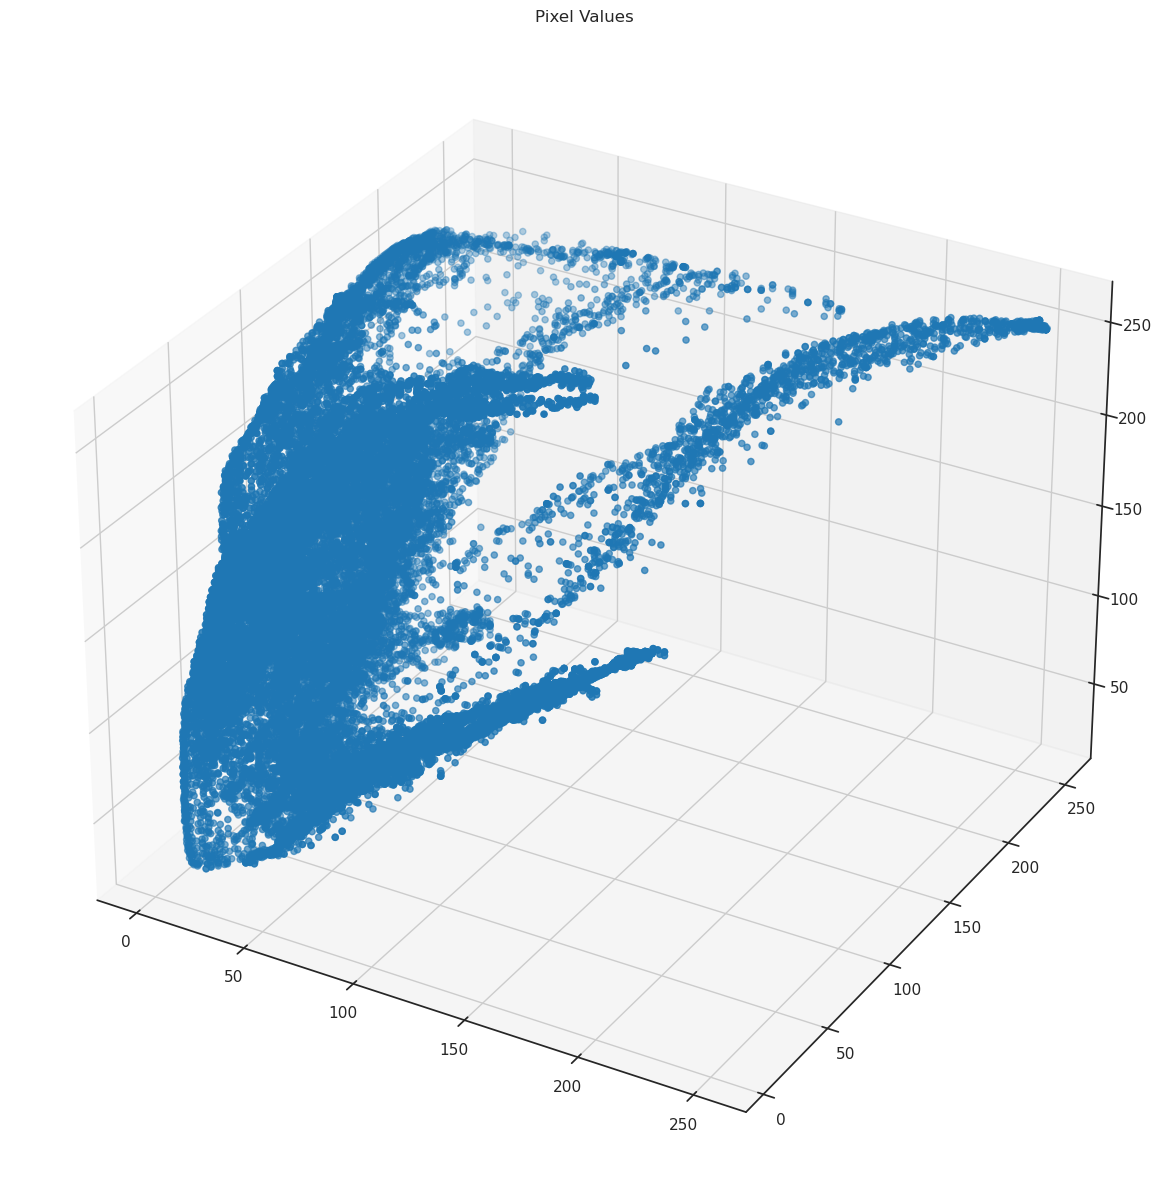

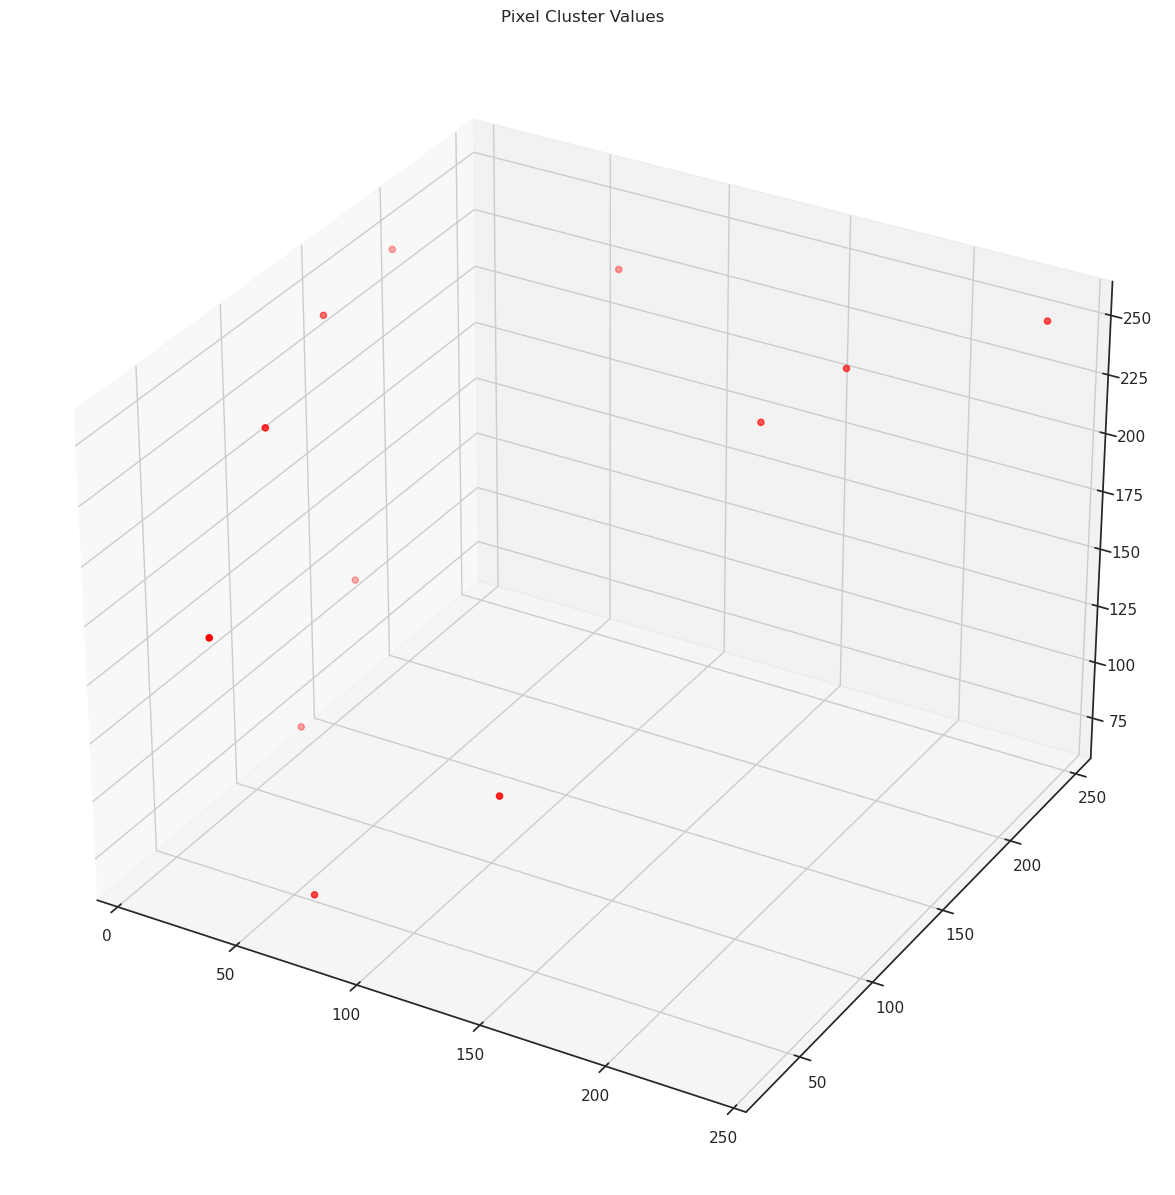

In [322]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [324]:
result = np.zeros(X.shape, dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled == label, :]=cluster_int8[label,:]

result=result.reshape(img.shape)


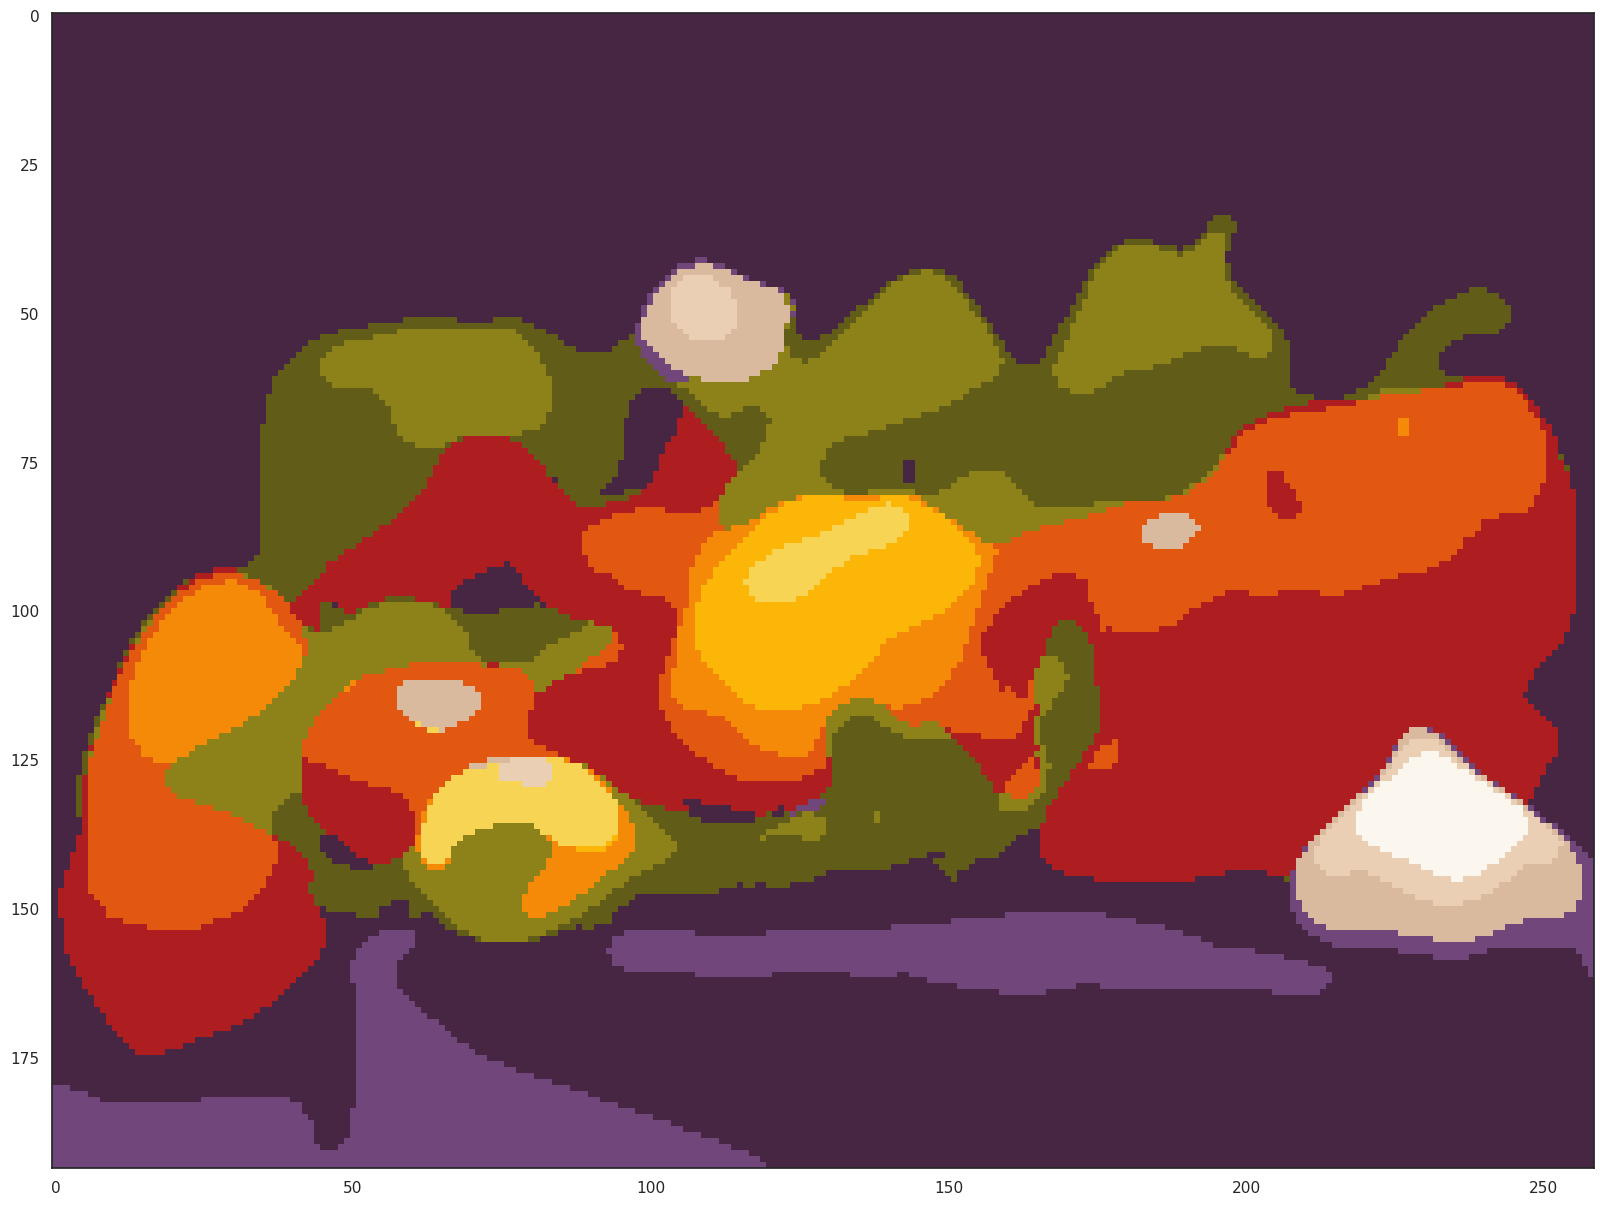

In [326]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

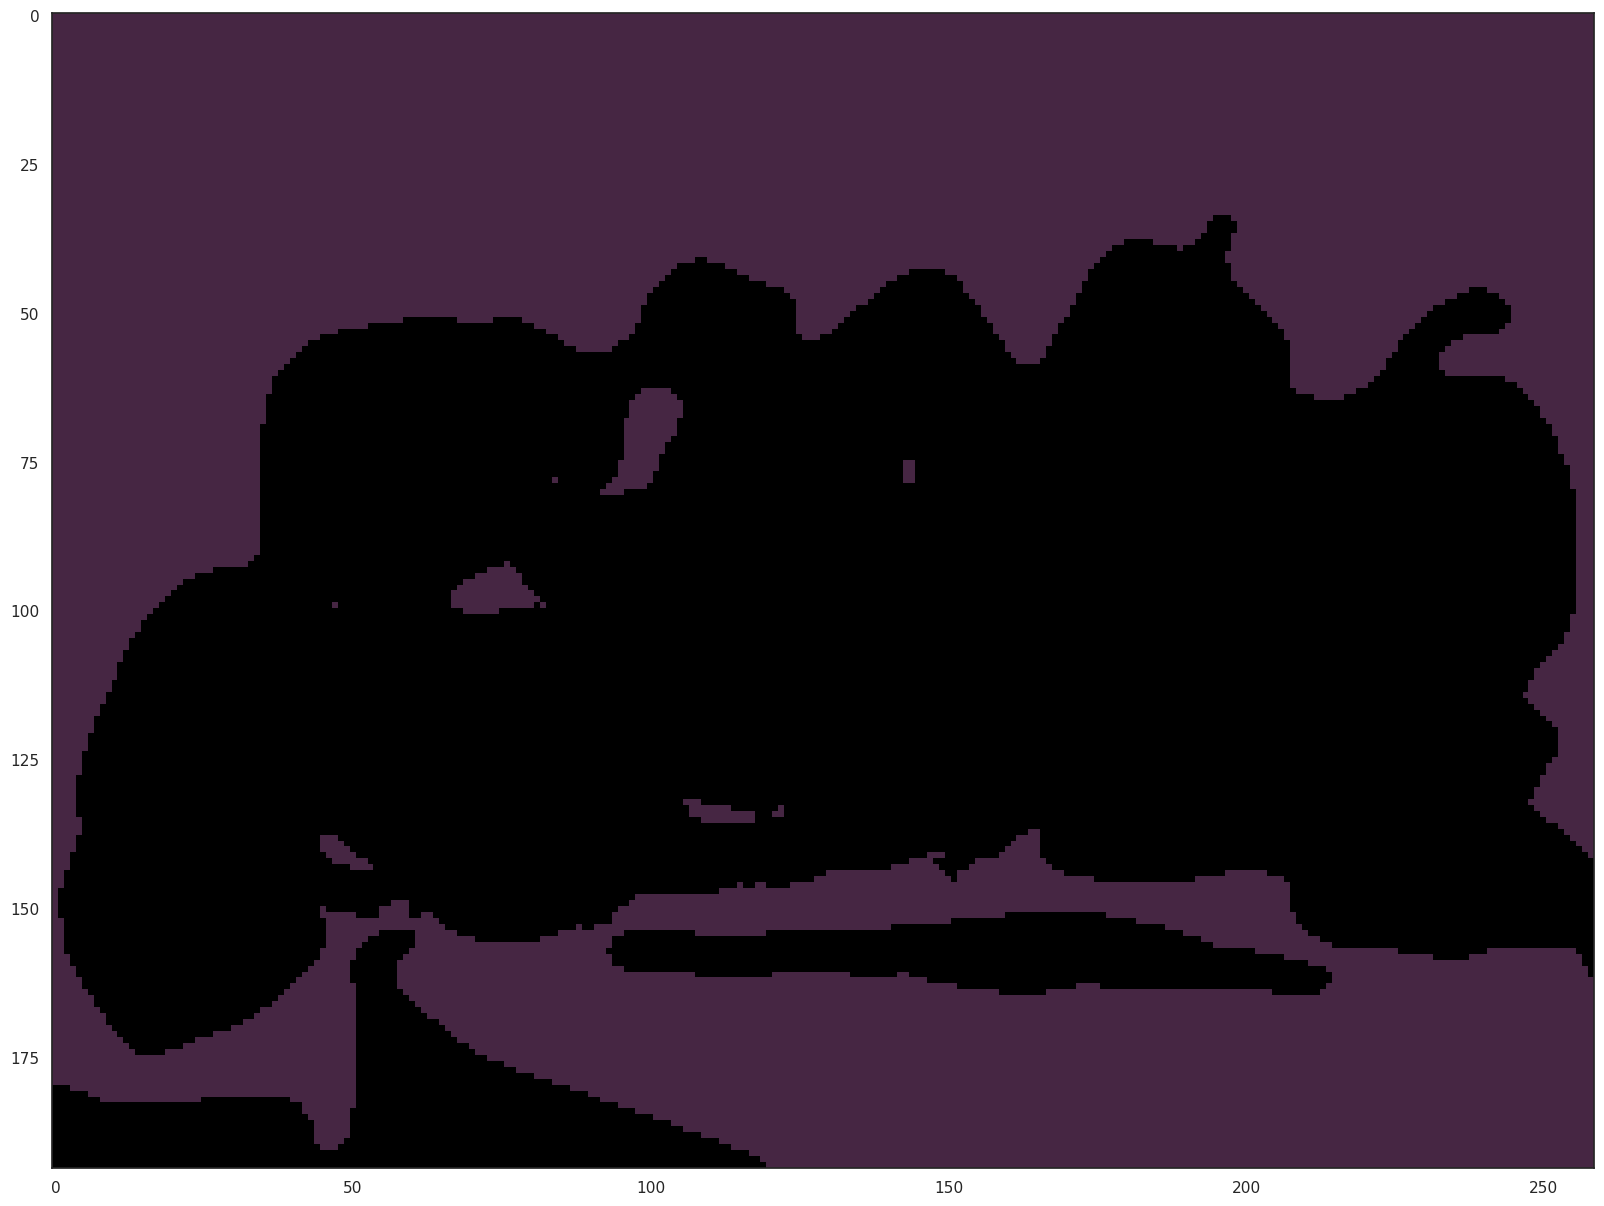

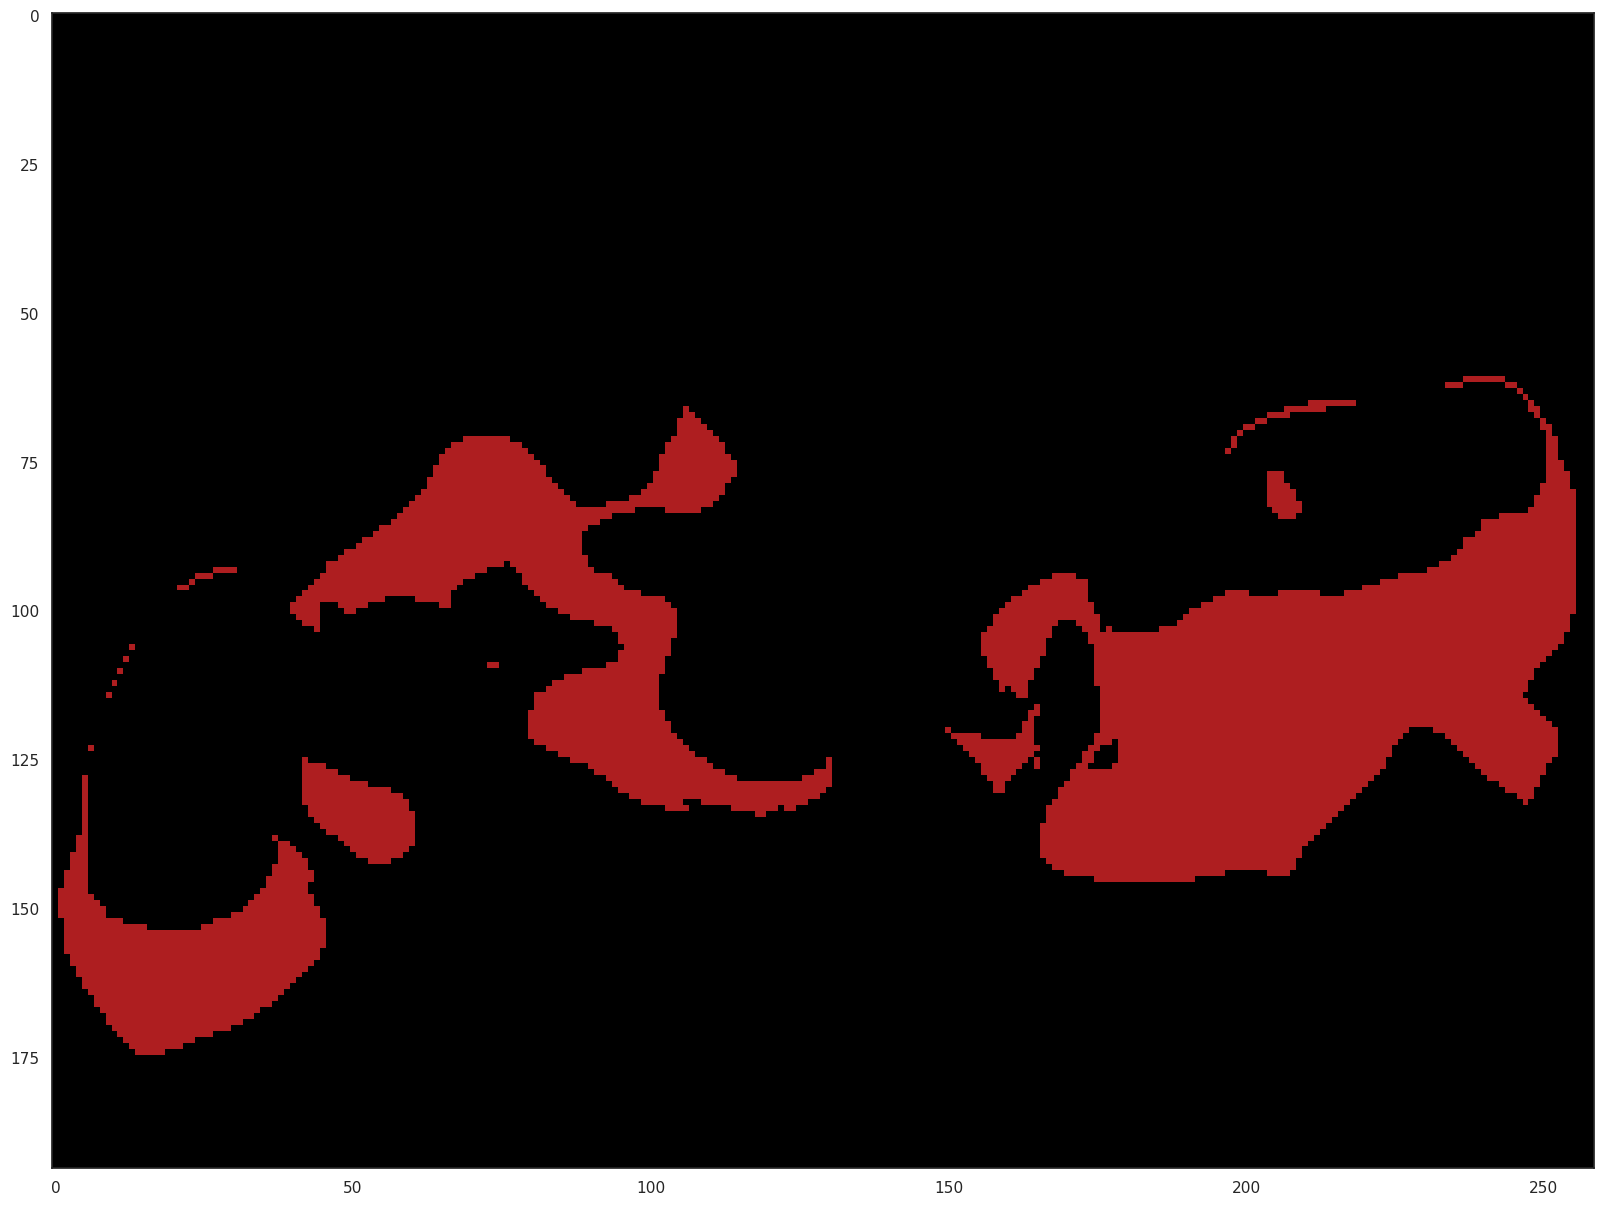

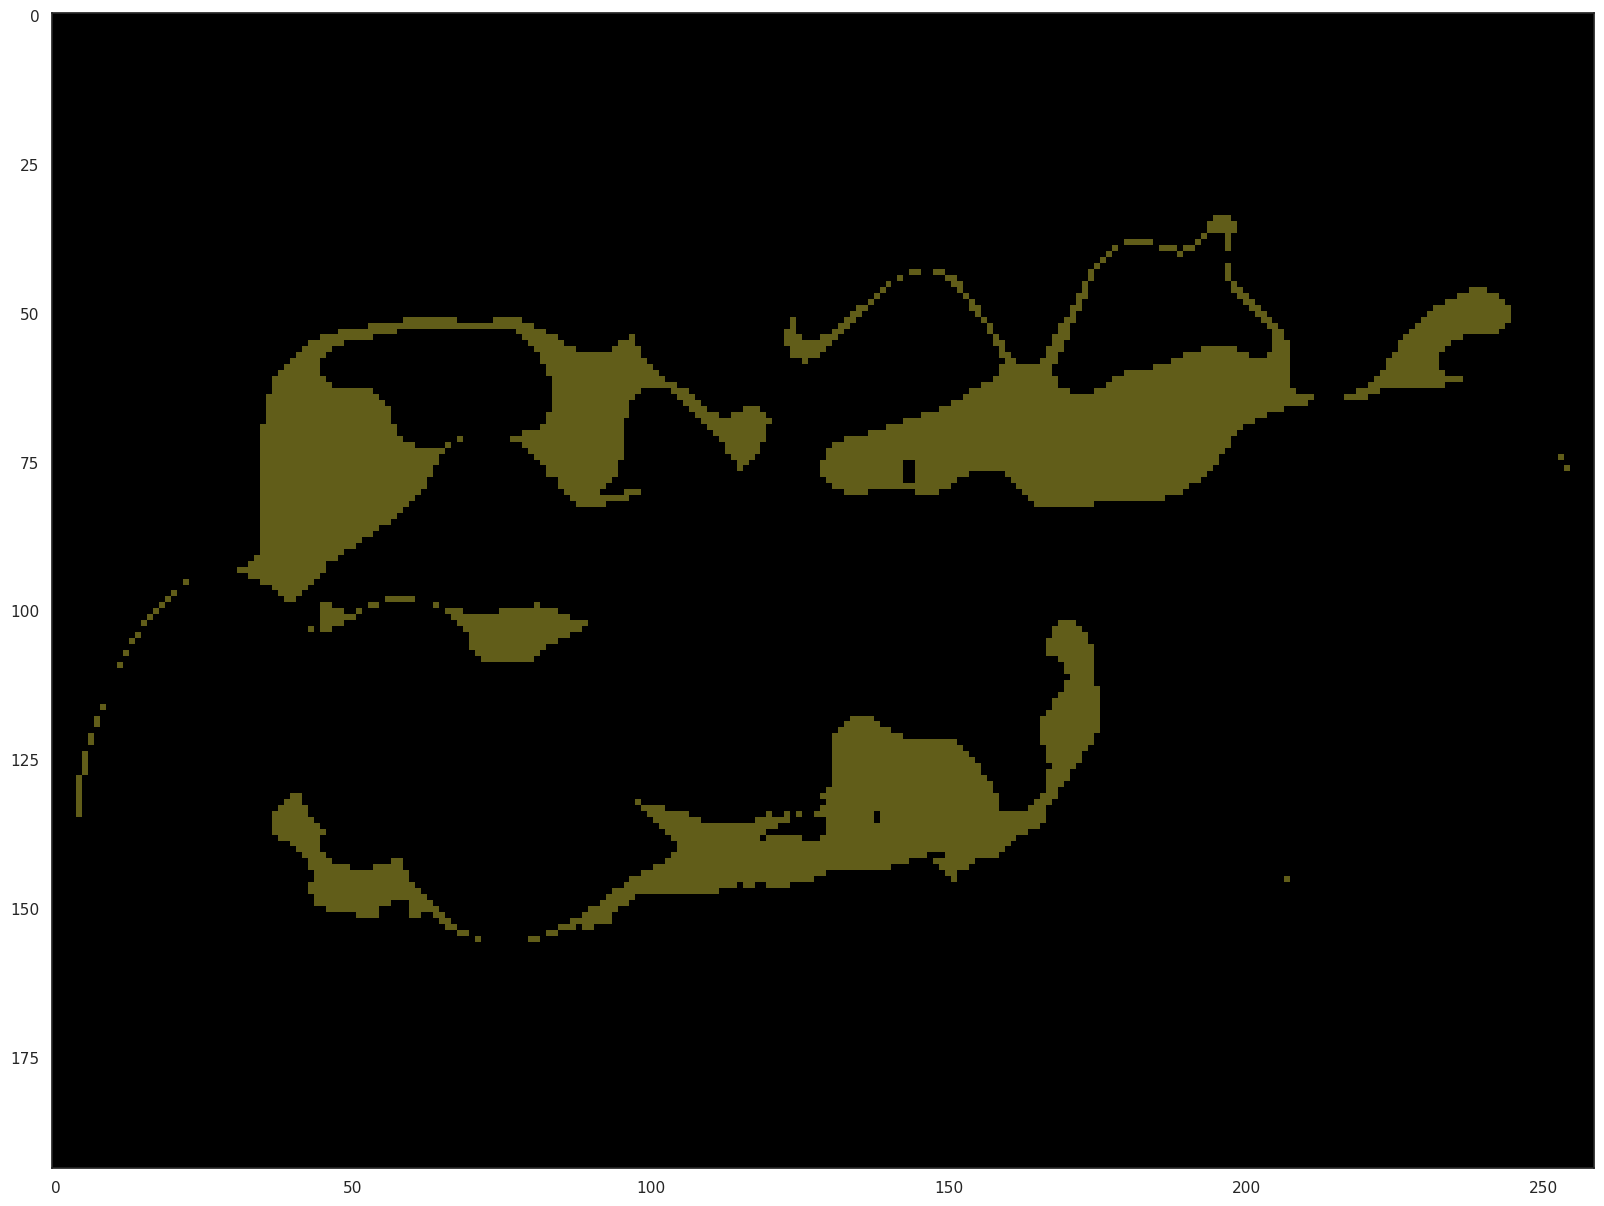

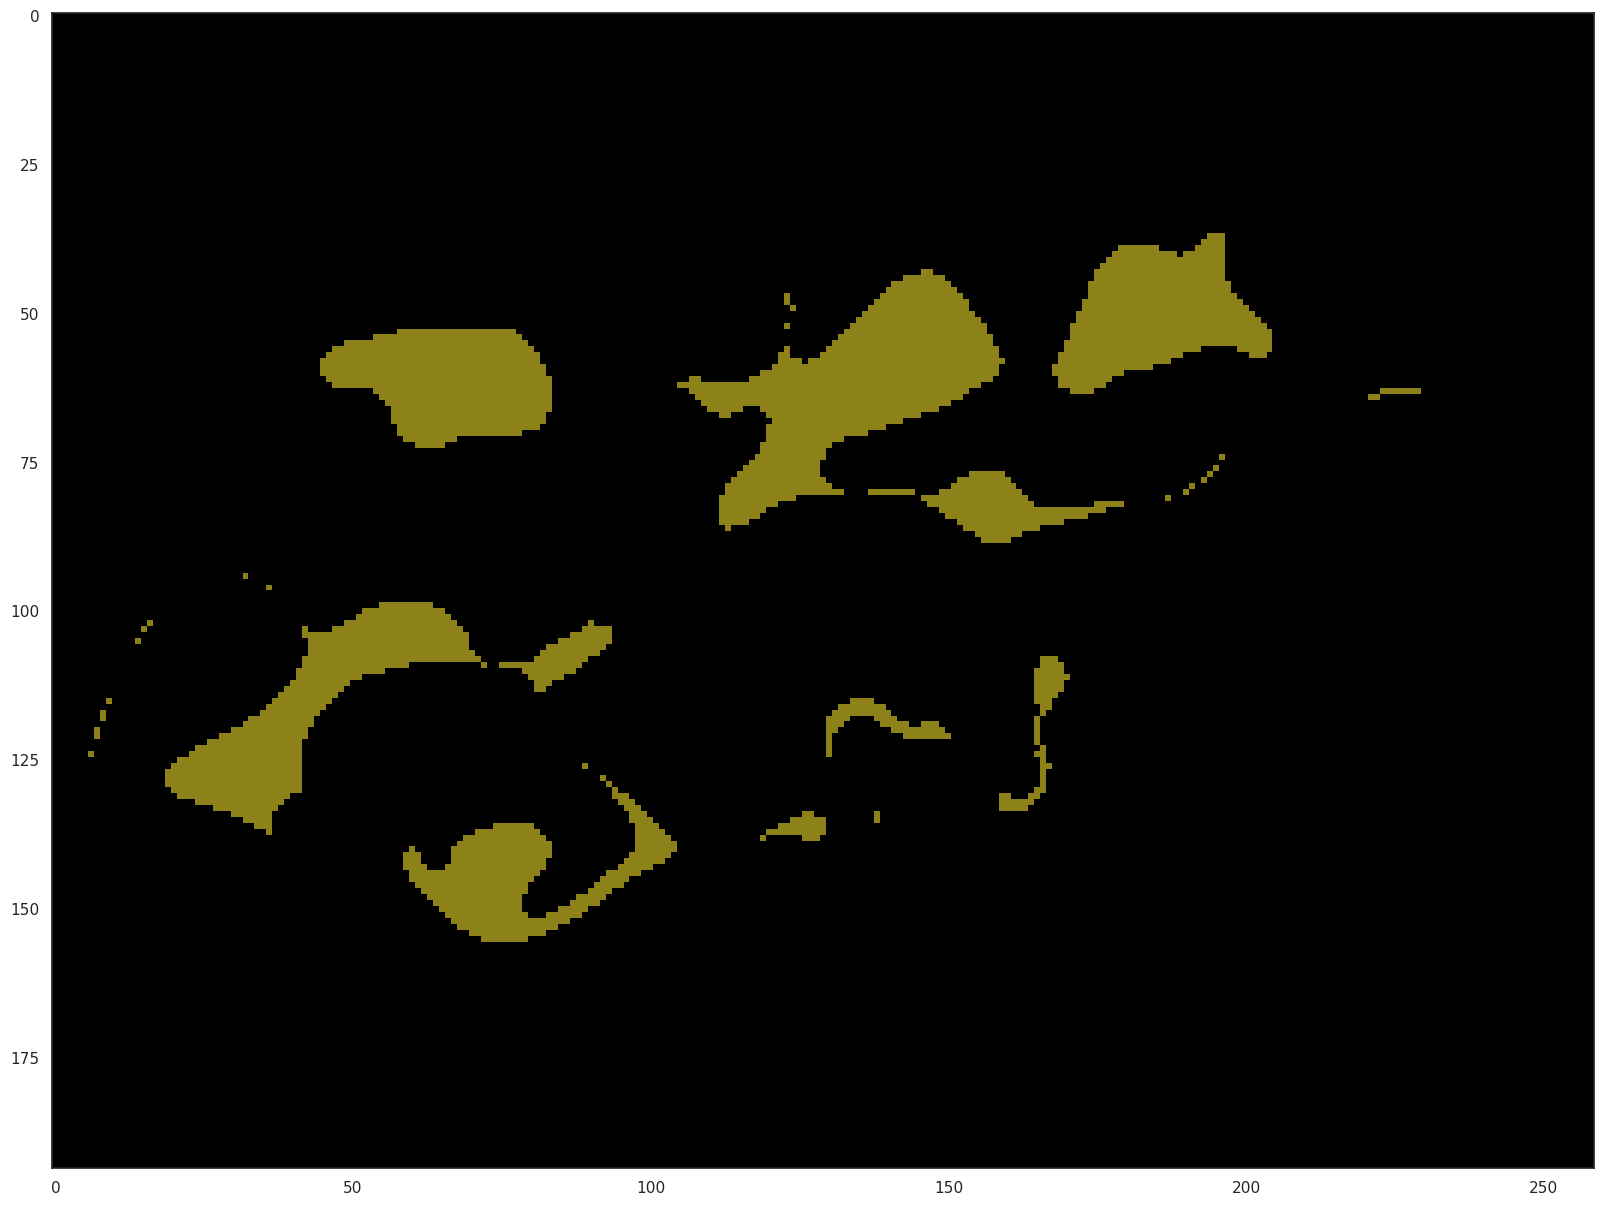

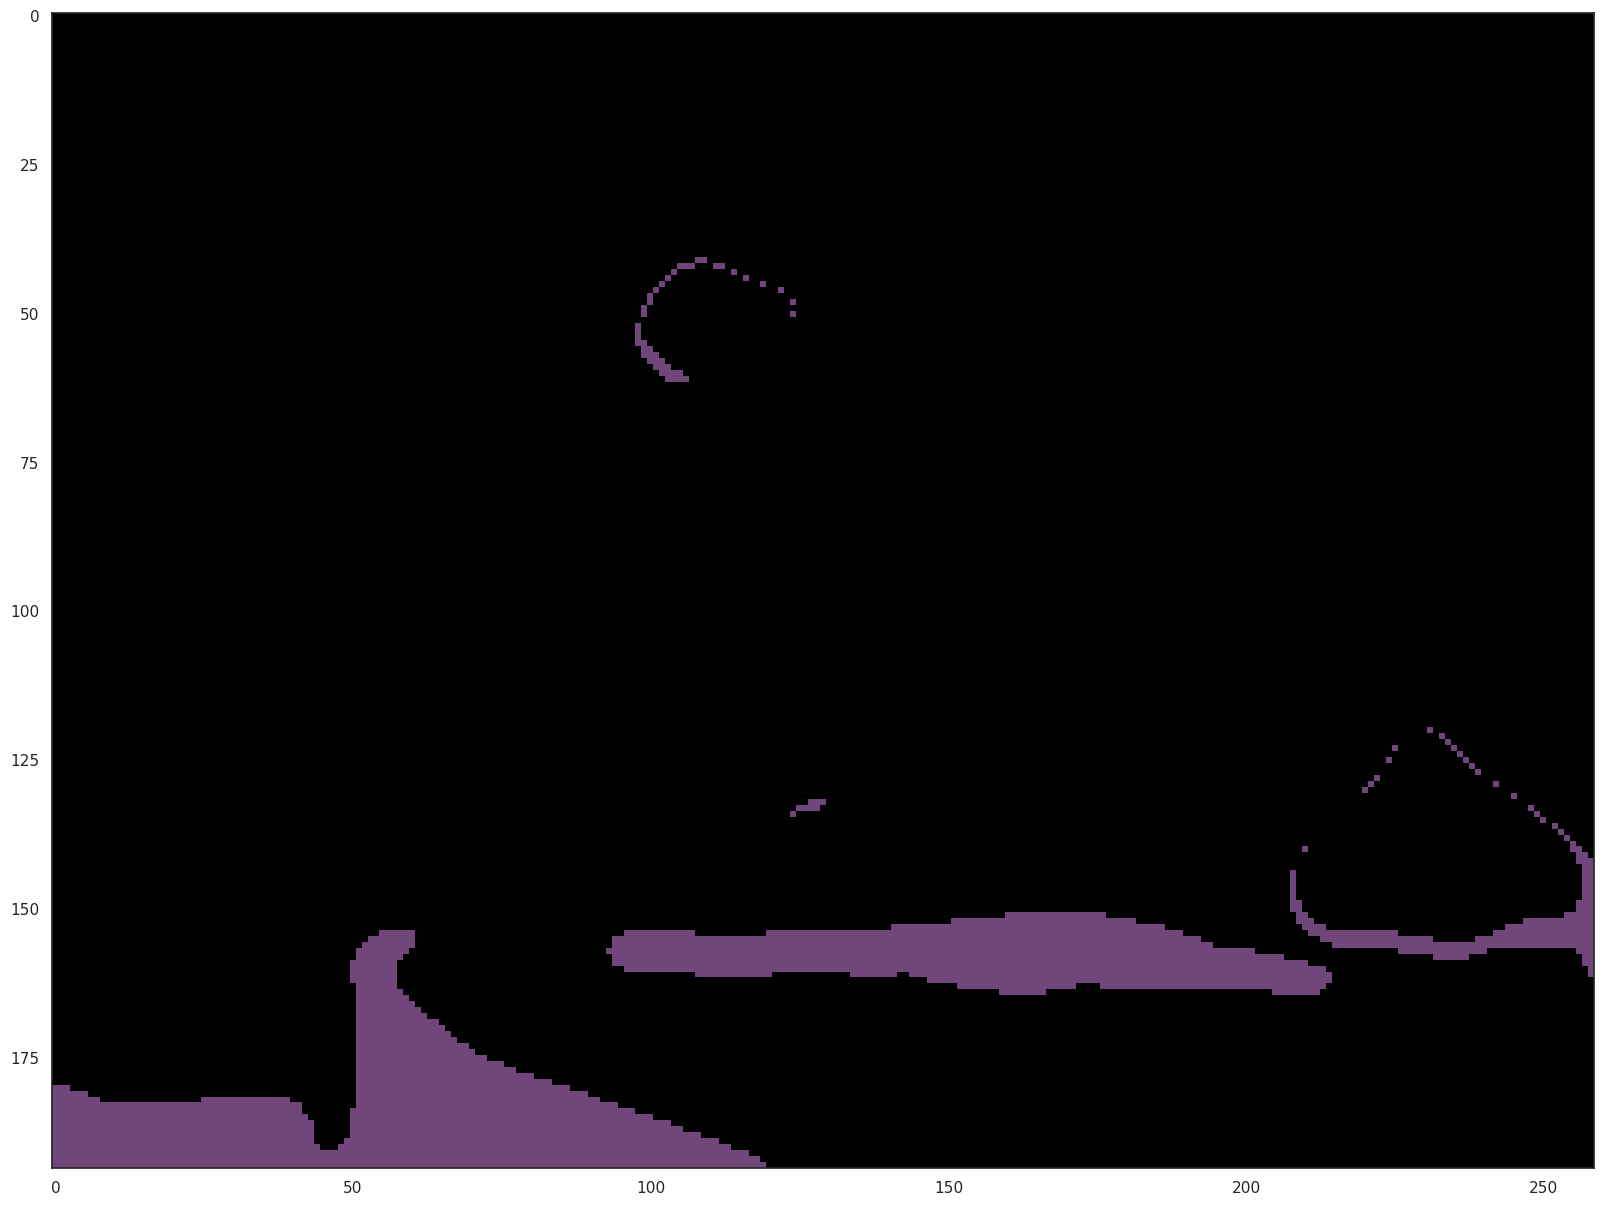

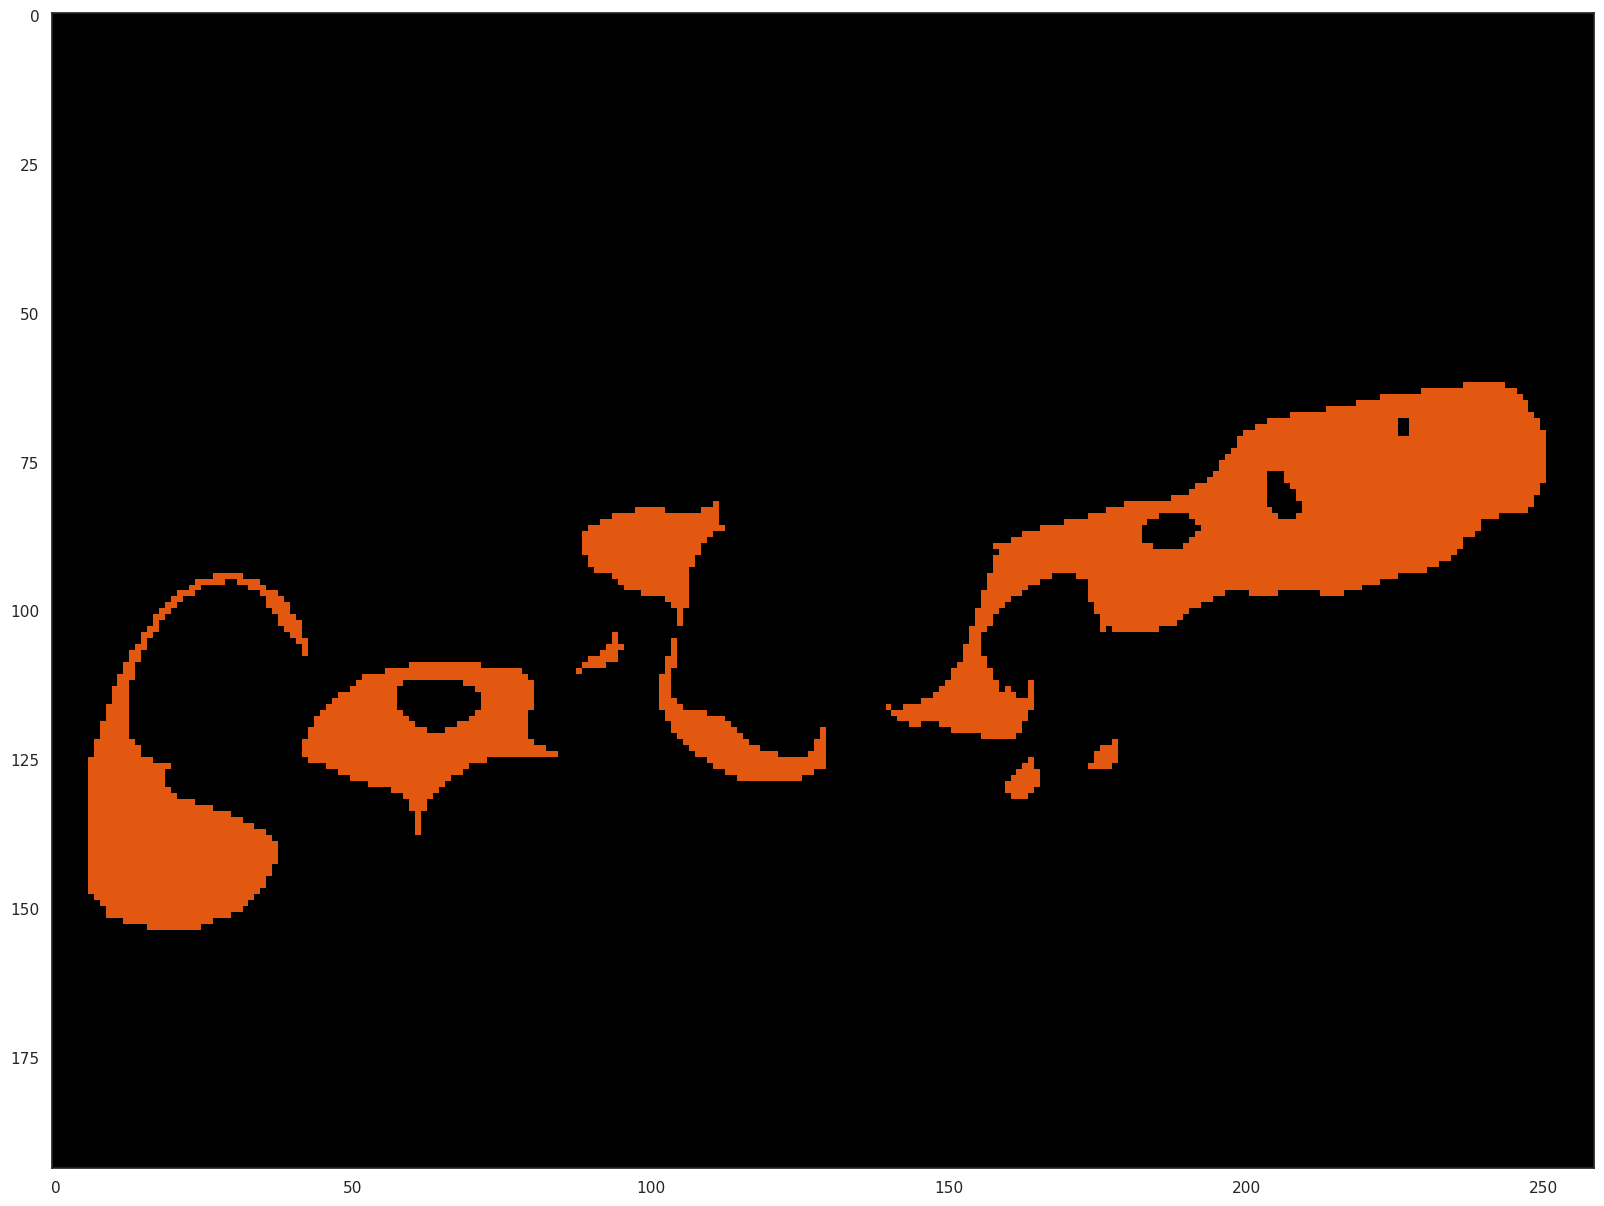

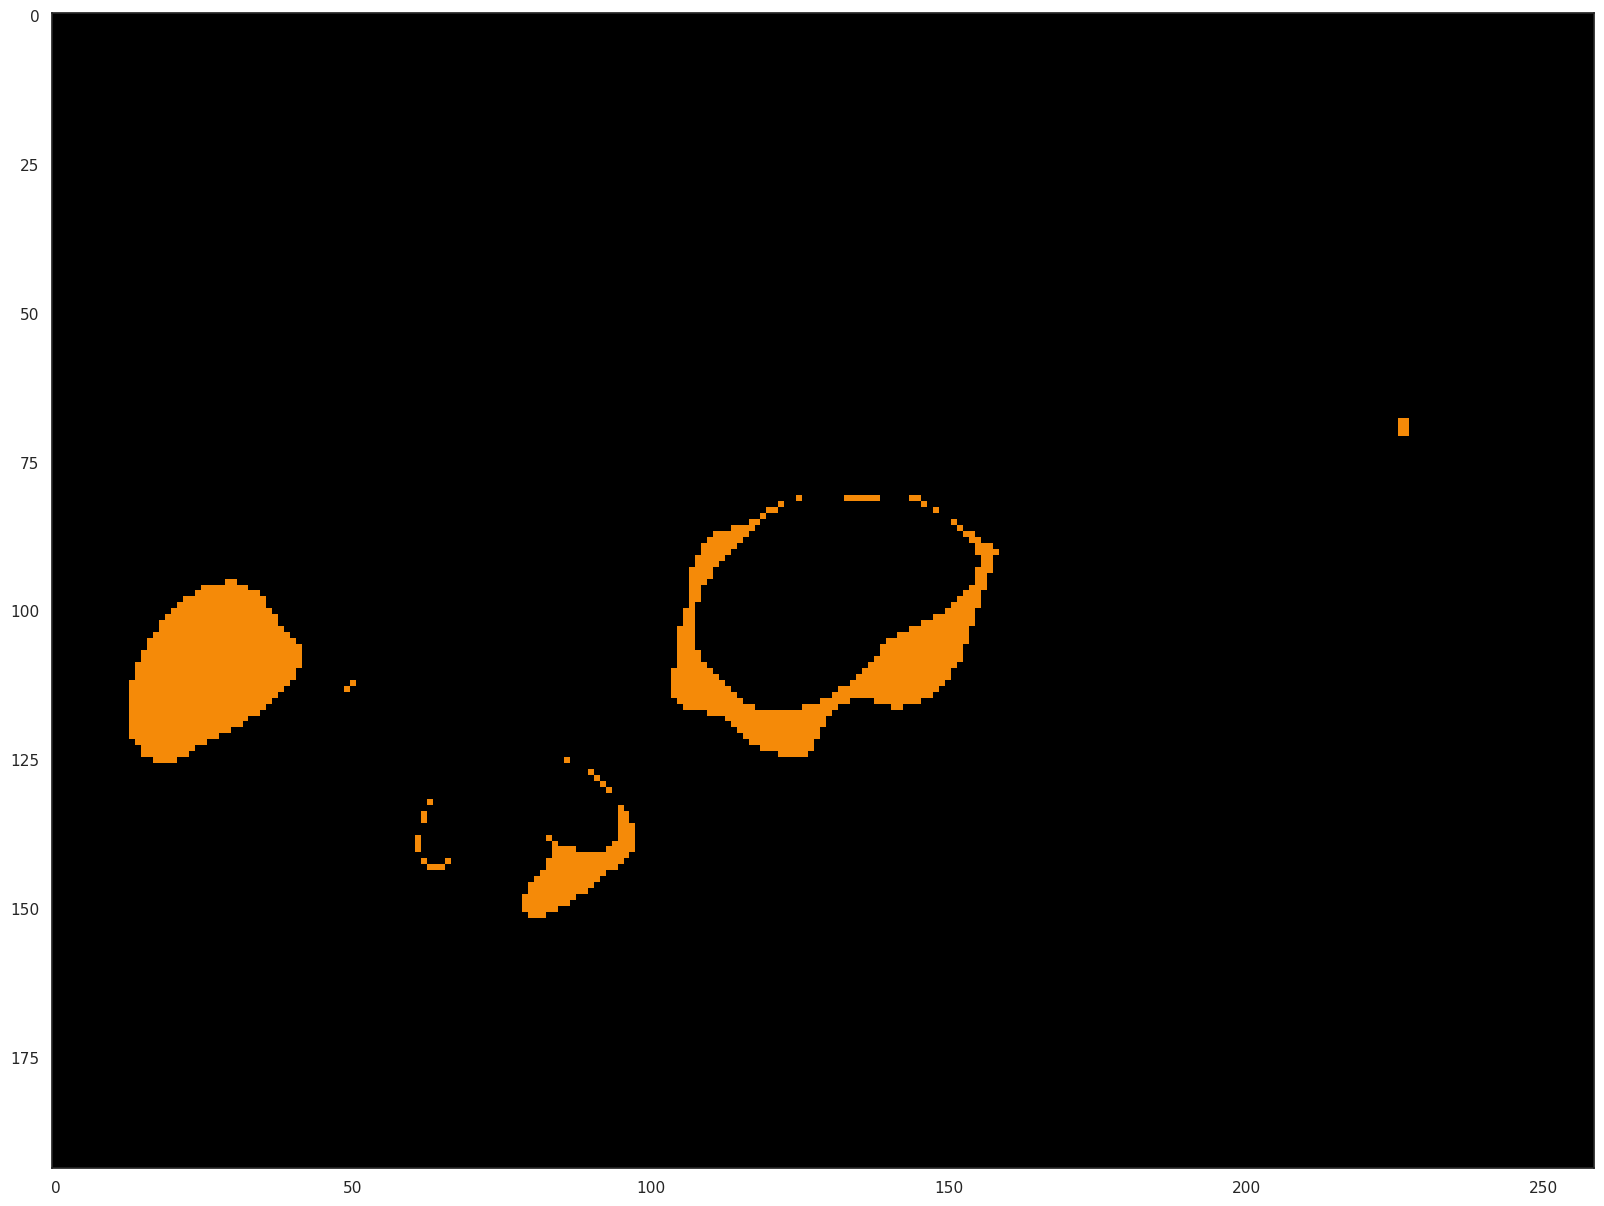

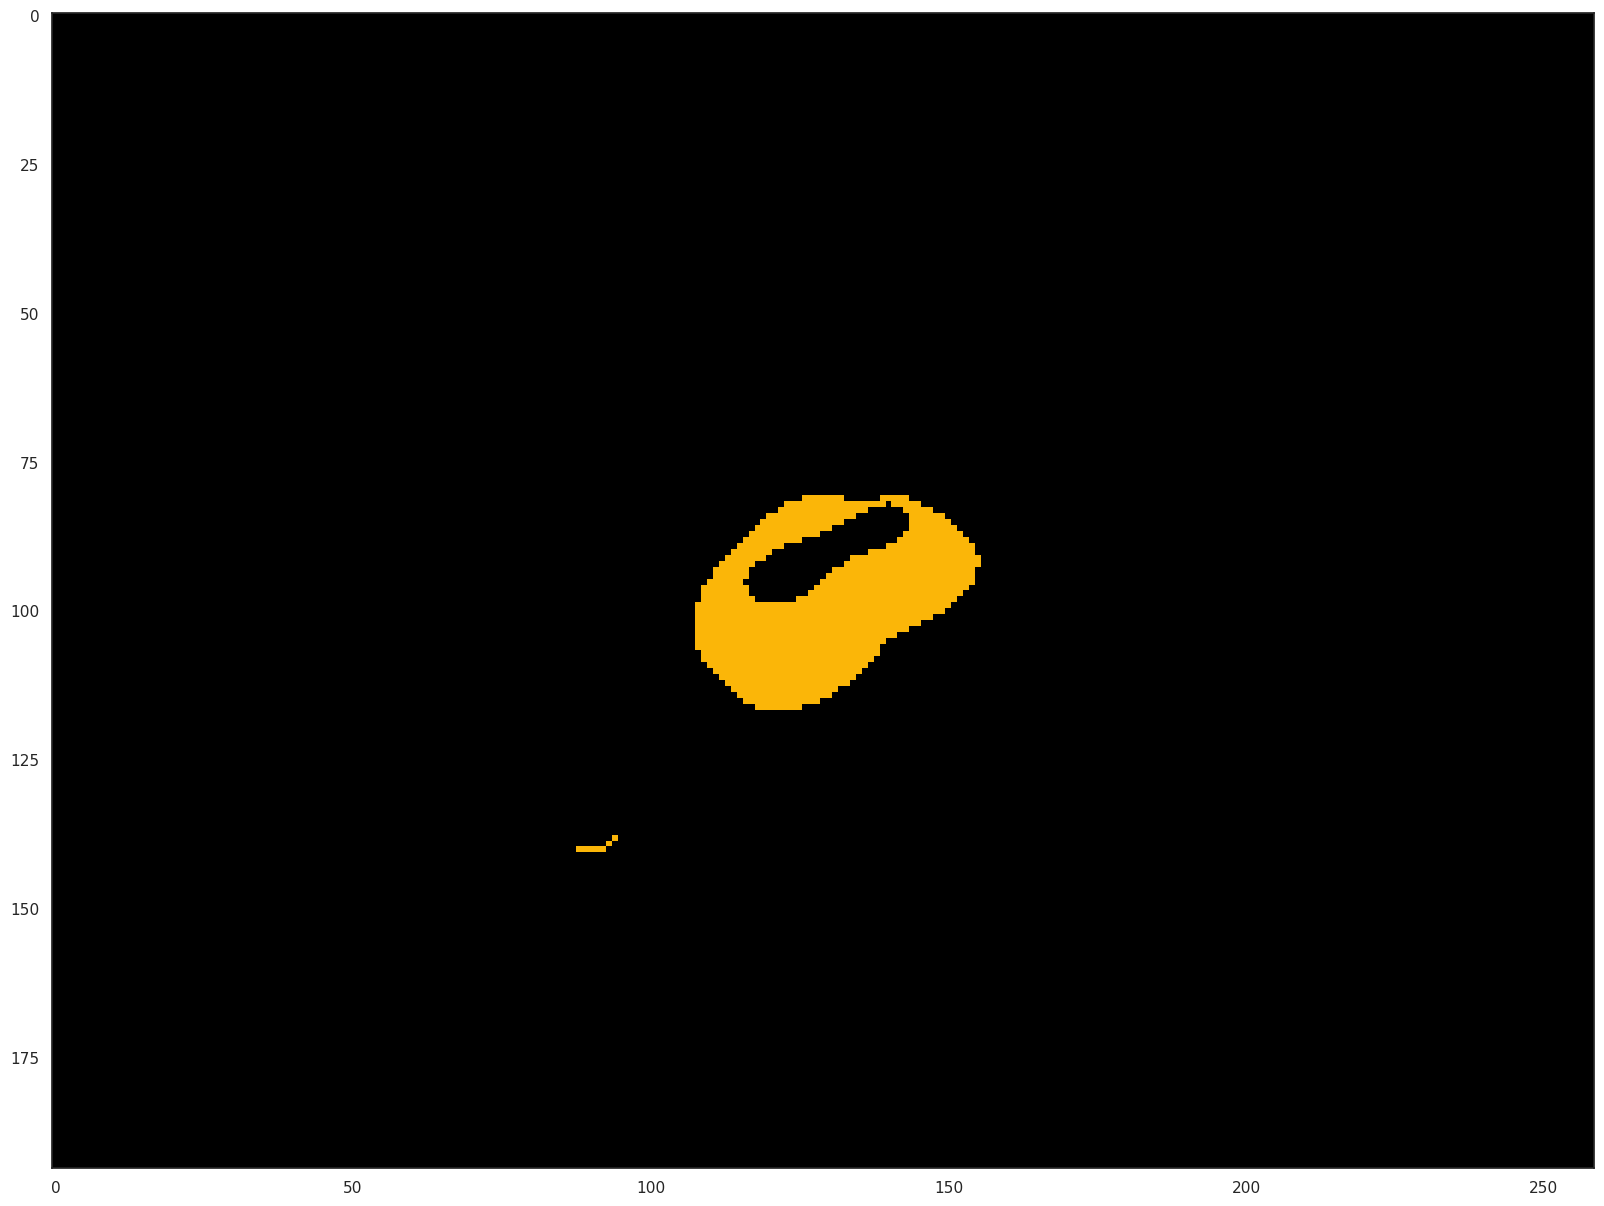

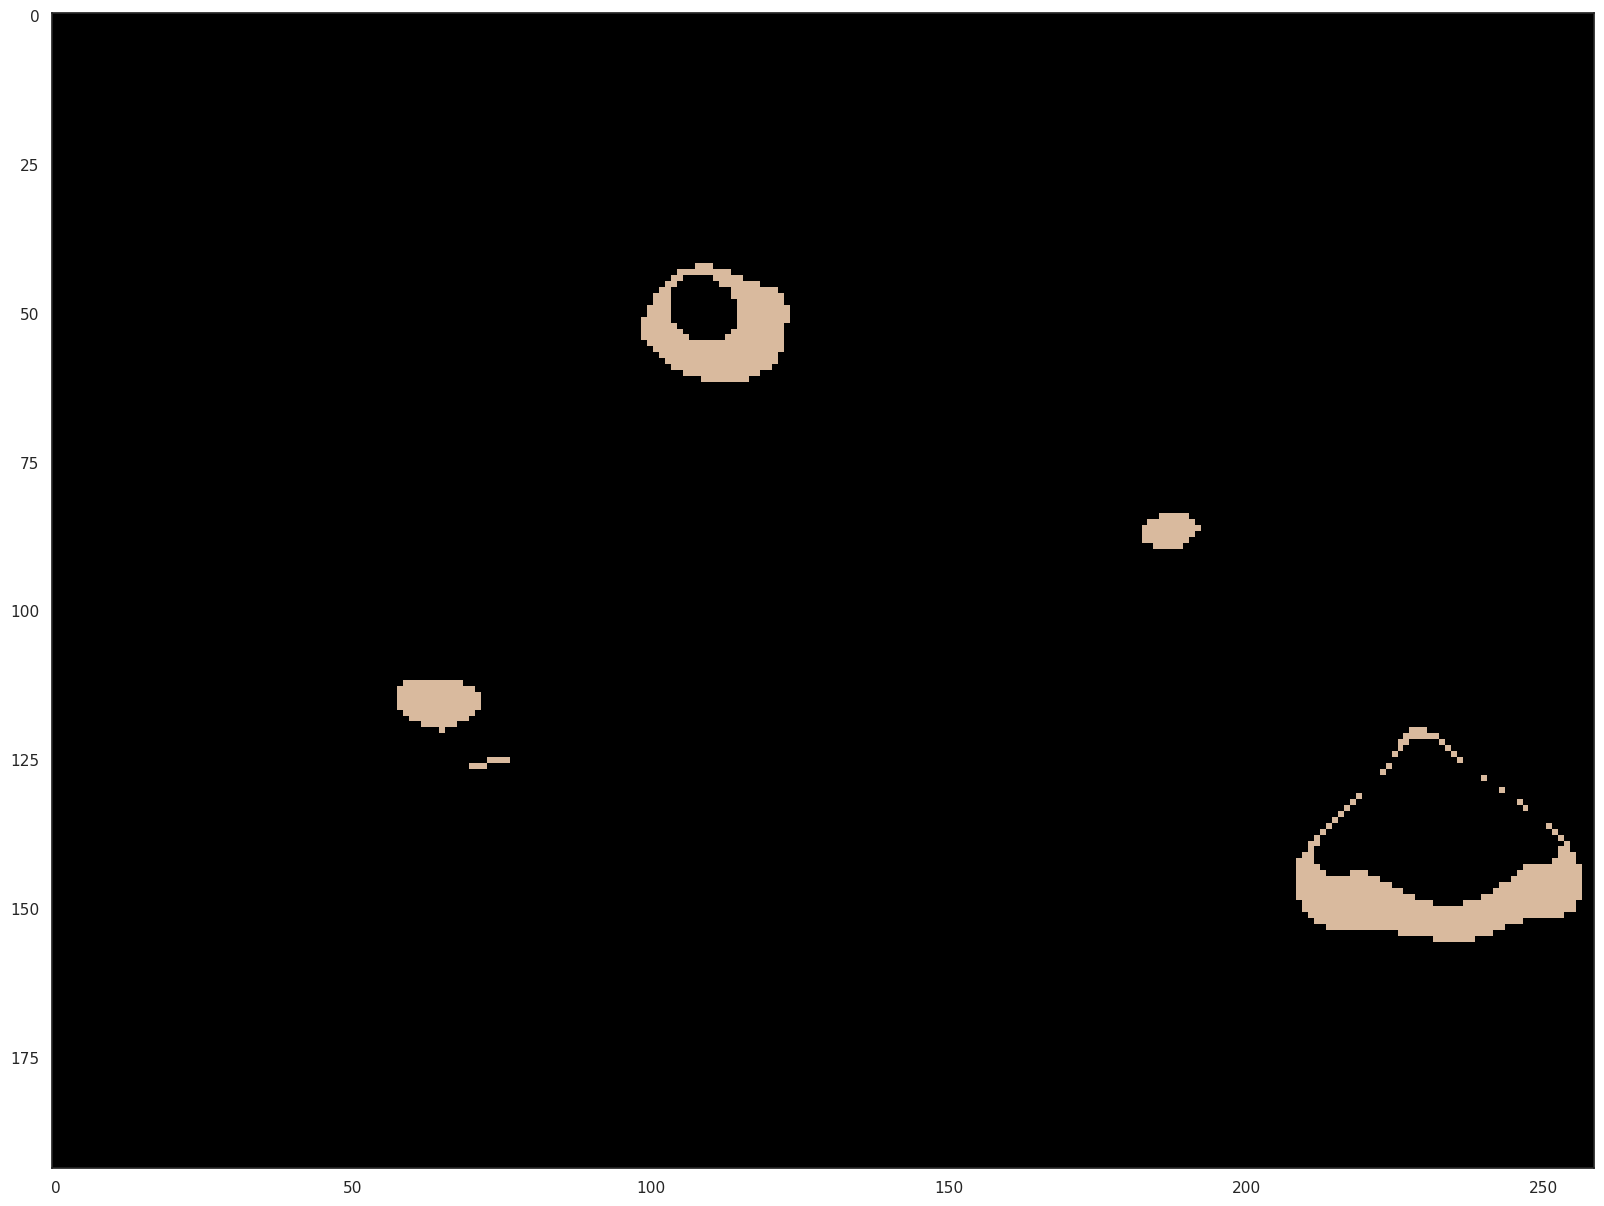

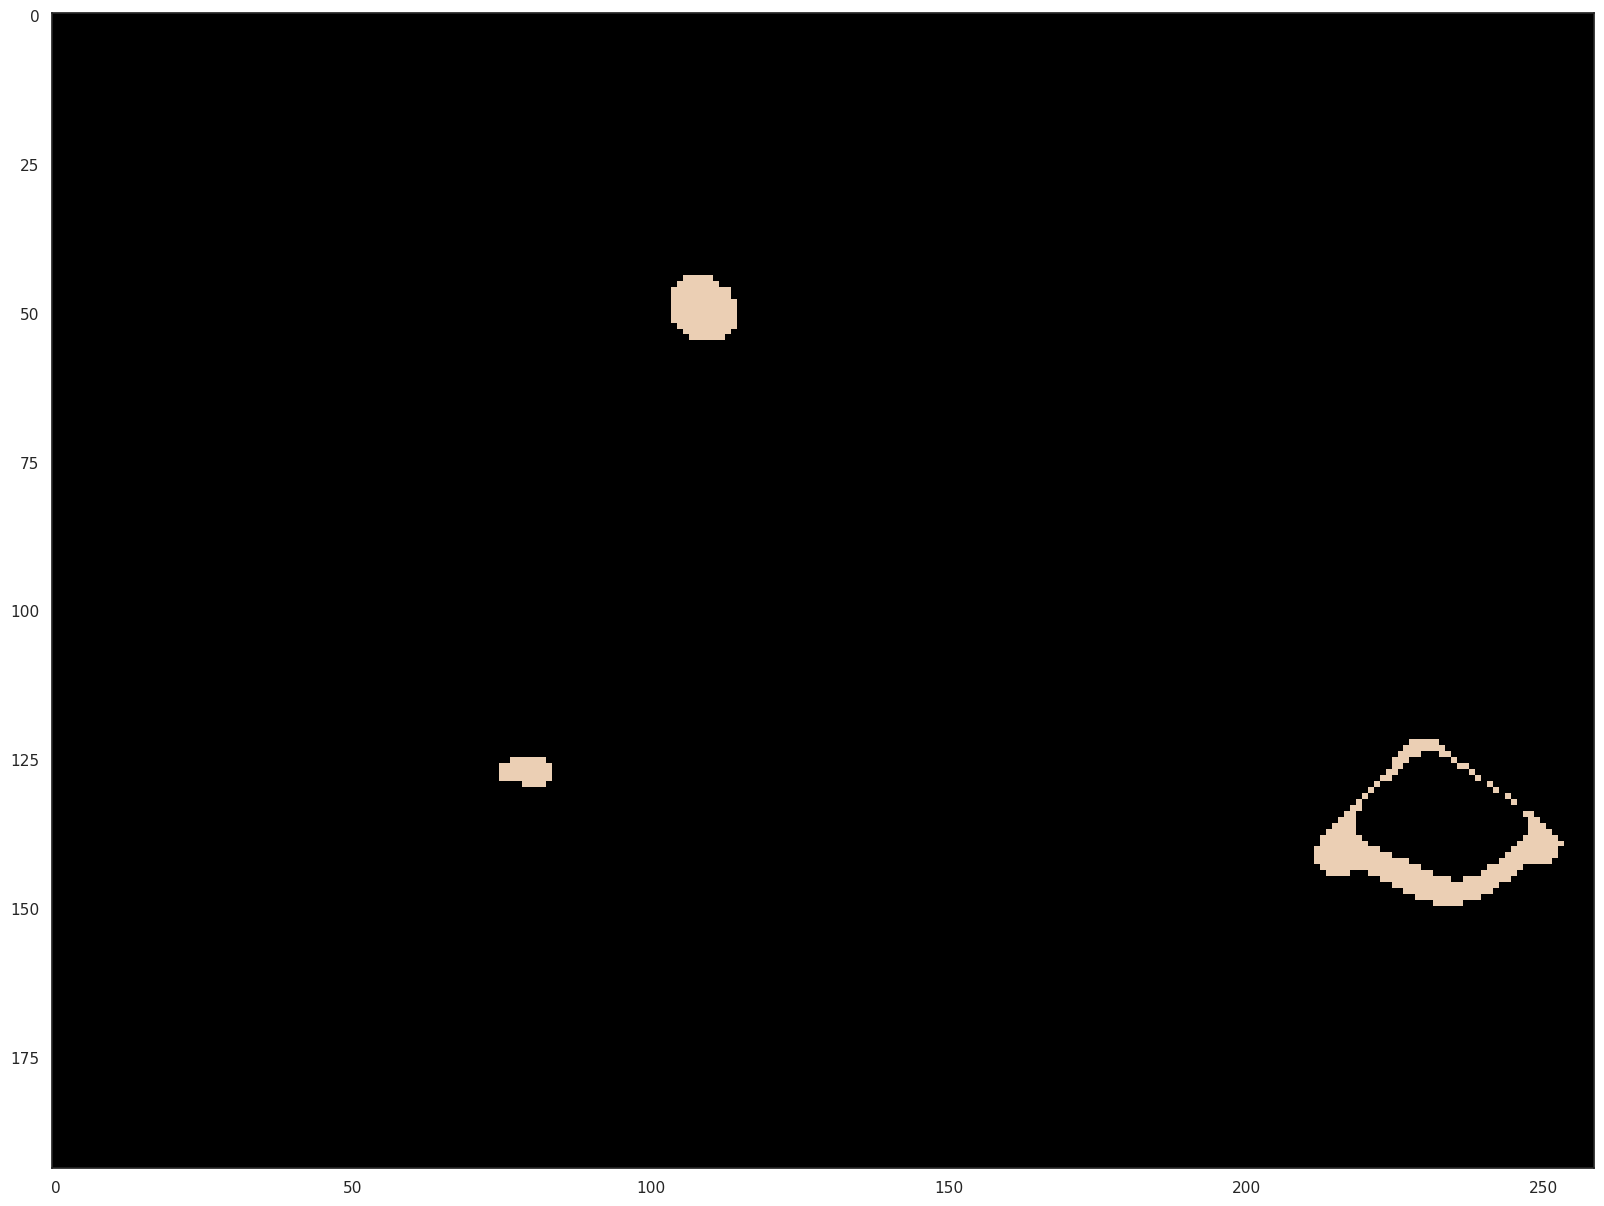

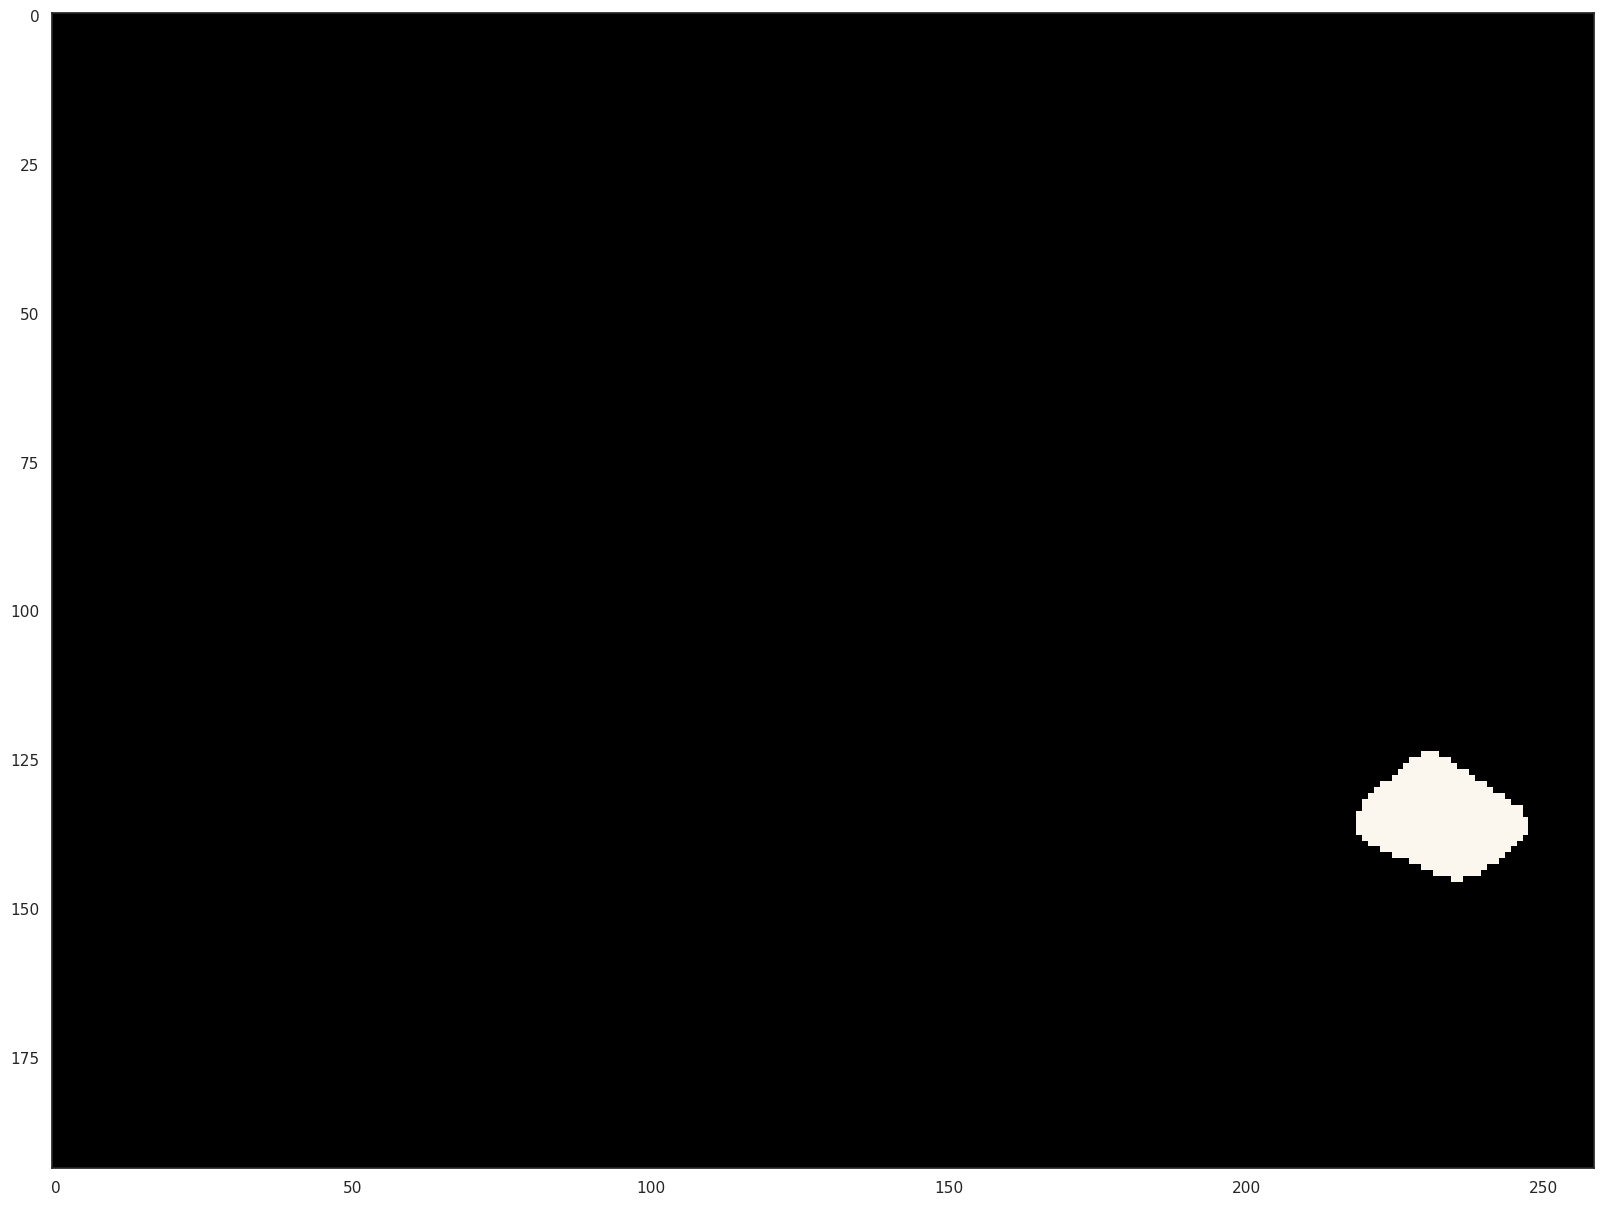

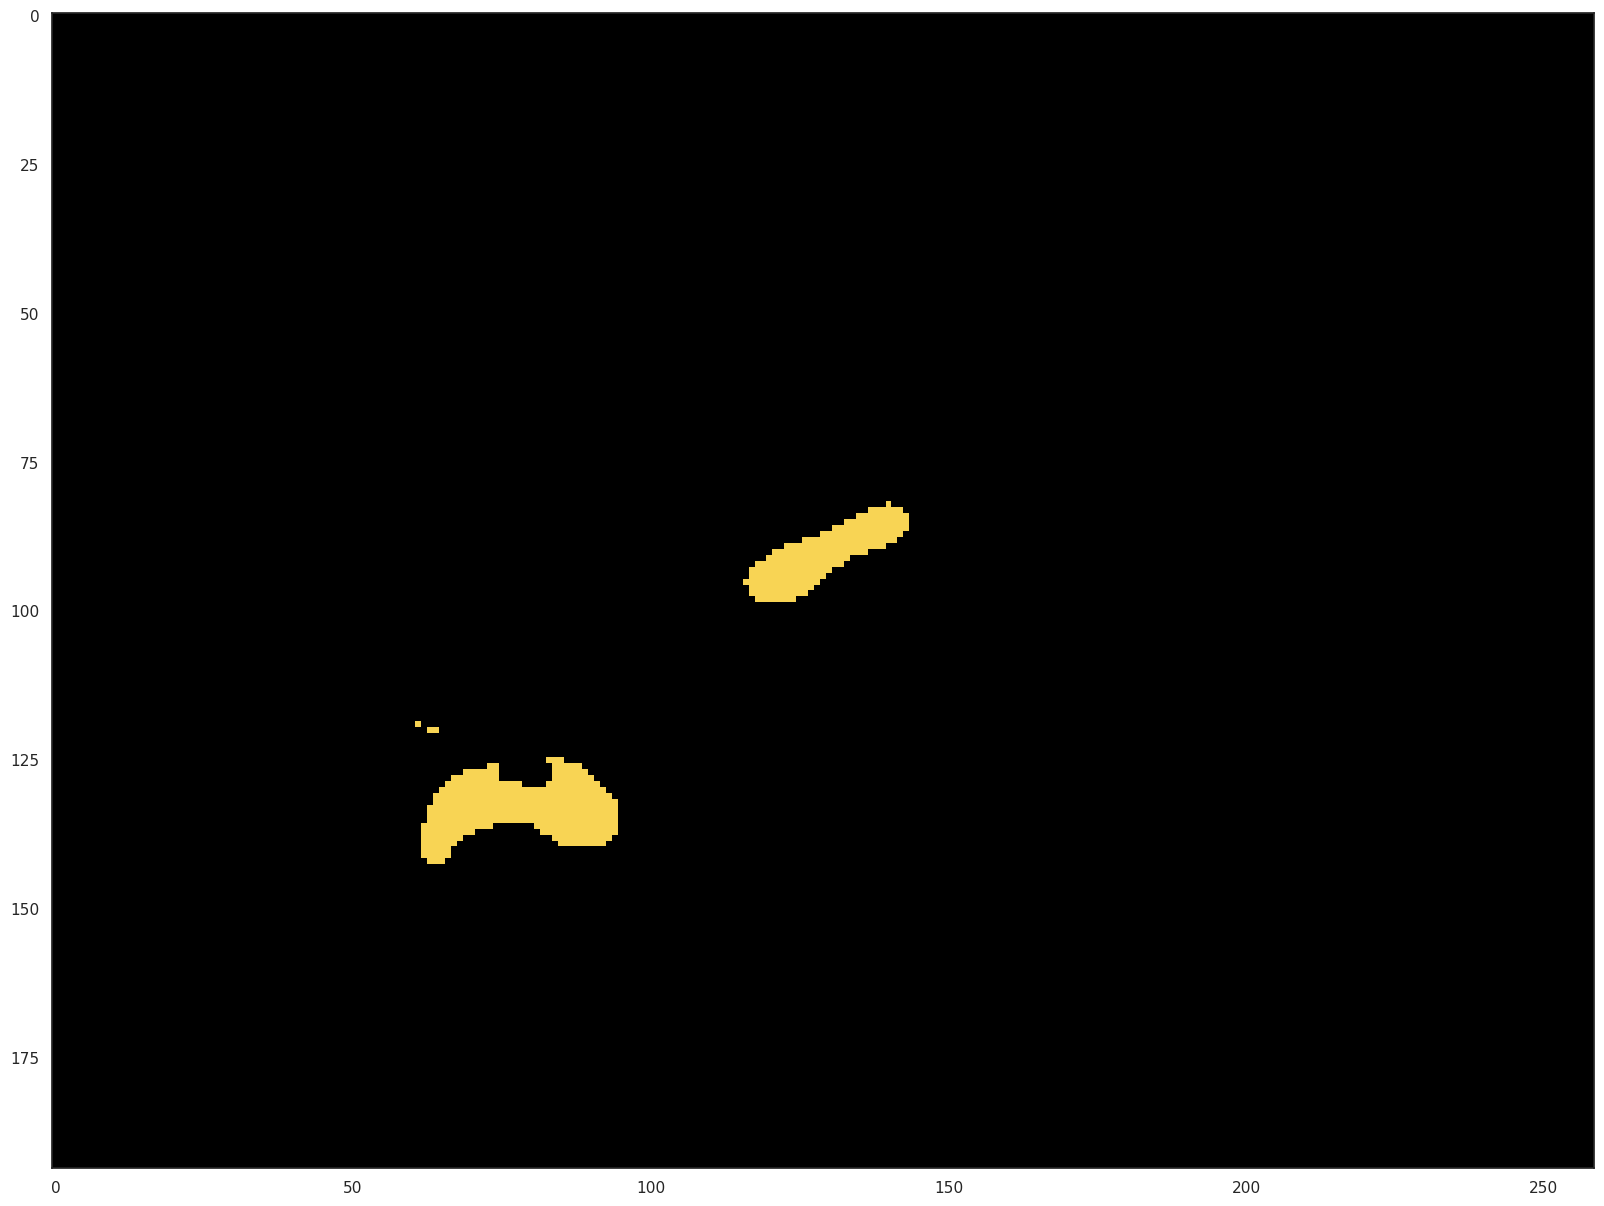

In [327]:
for label in np.unique(labeled):
    result = np.zeros(X.shape, dtype=np.uint8)
    result[labeled==label,:] = cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

In [328]:
import requests 
url='https://www.plastform.ca/wp-content/themes/plastform/images/slider-image-2.jpg'
name="my_file.jpg"

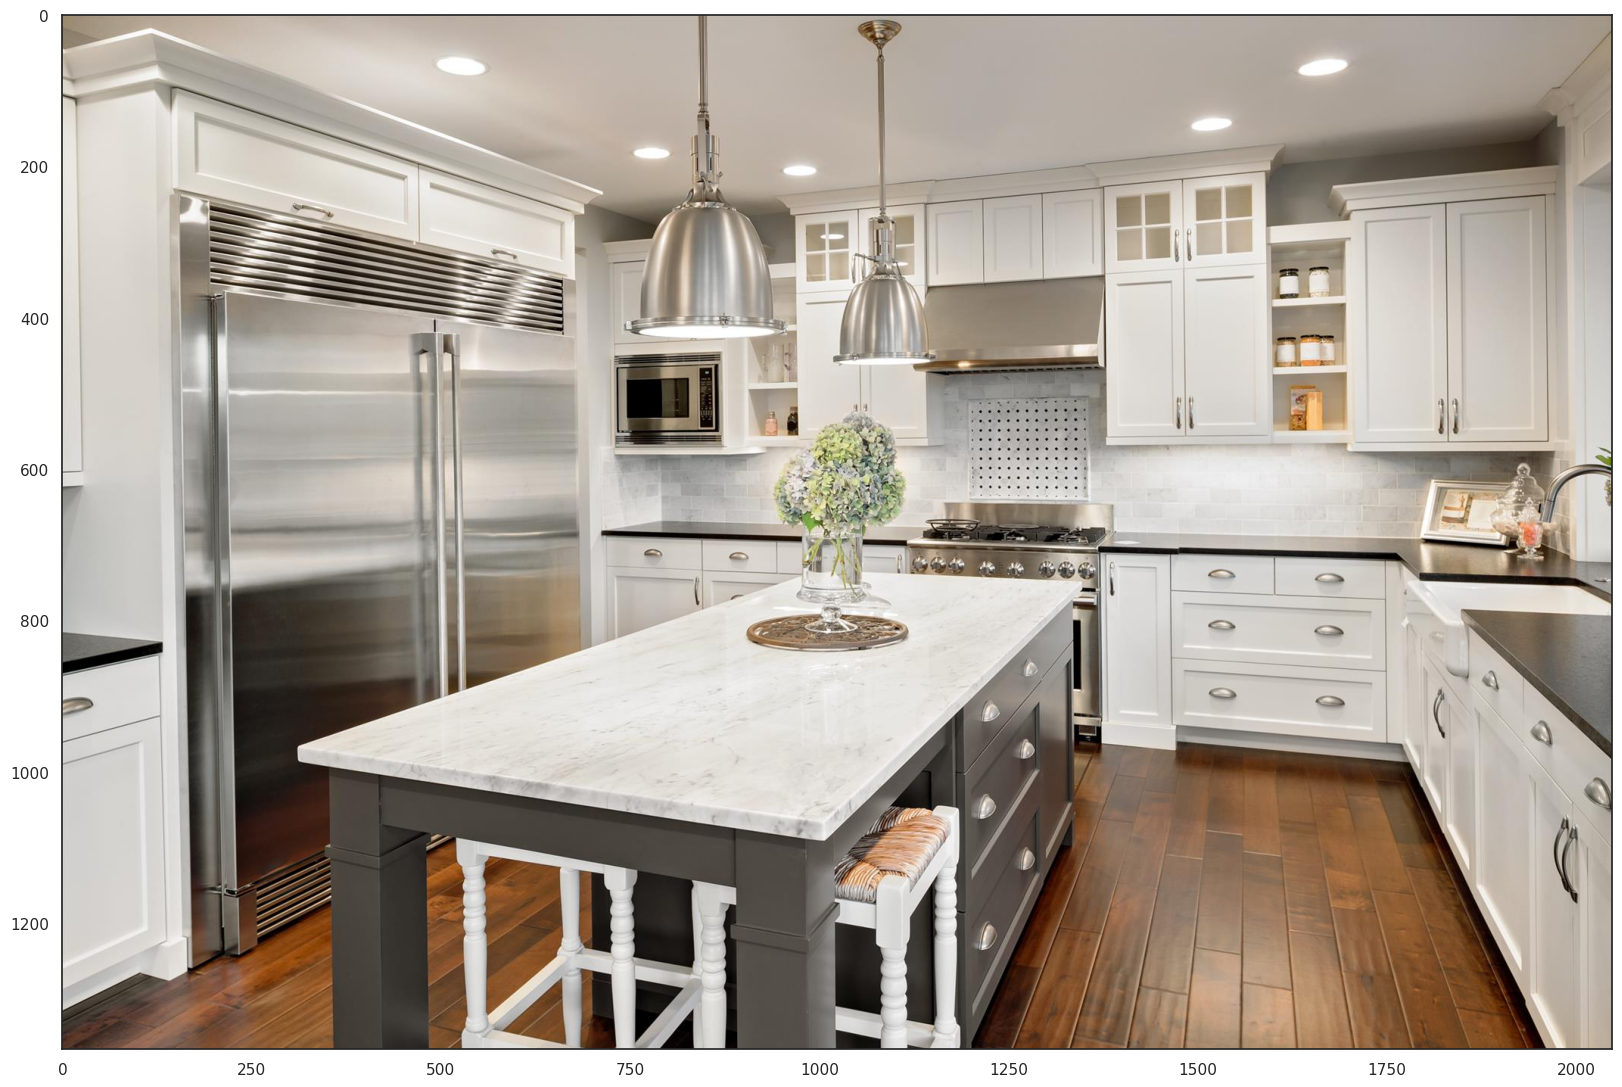

In [329]:
with open(name, 'wb') as file:
    file.write(requests.get(url, stream=True).content)

img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

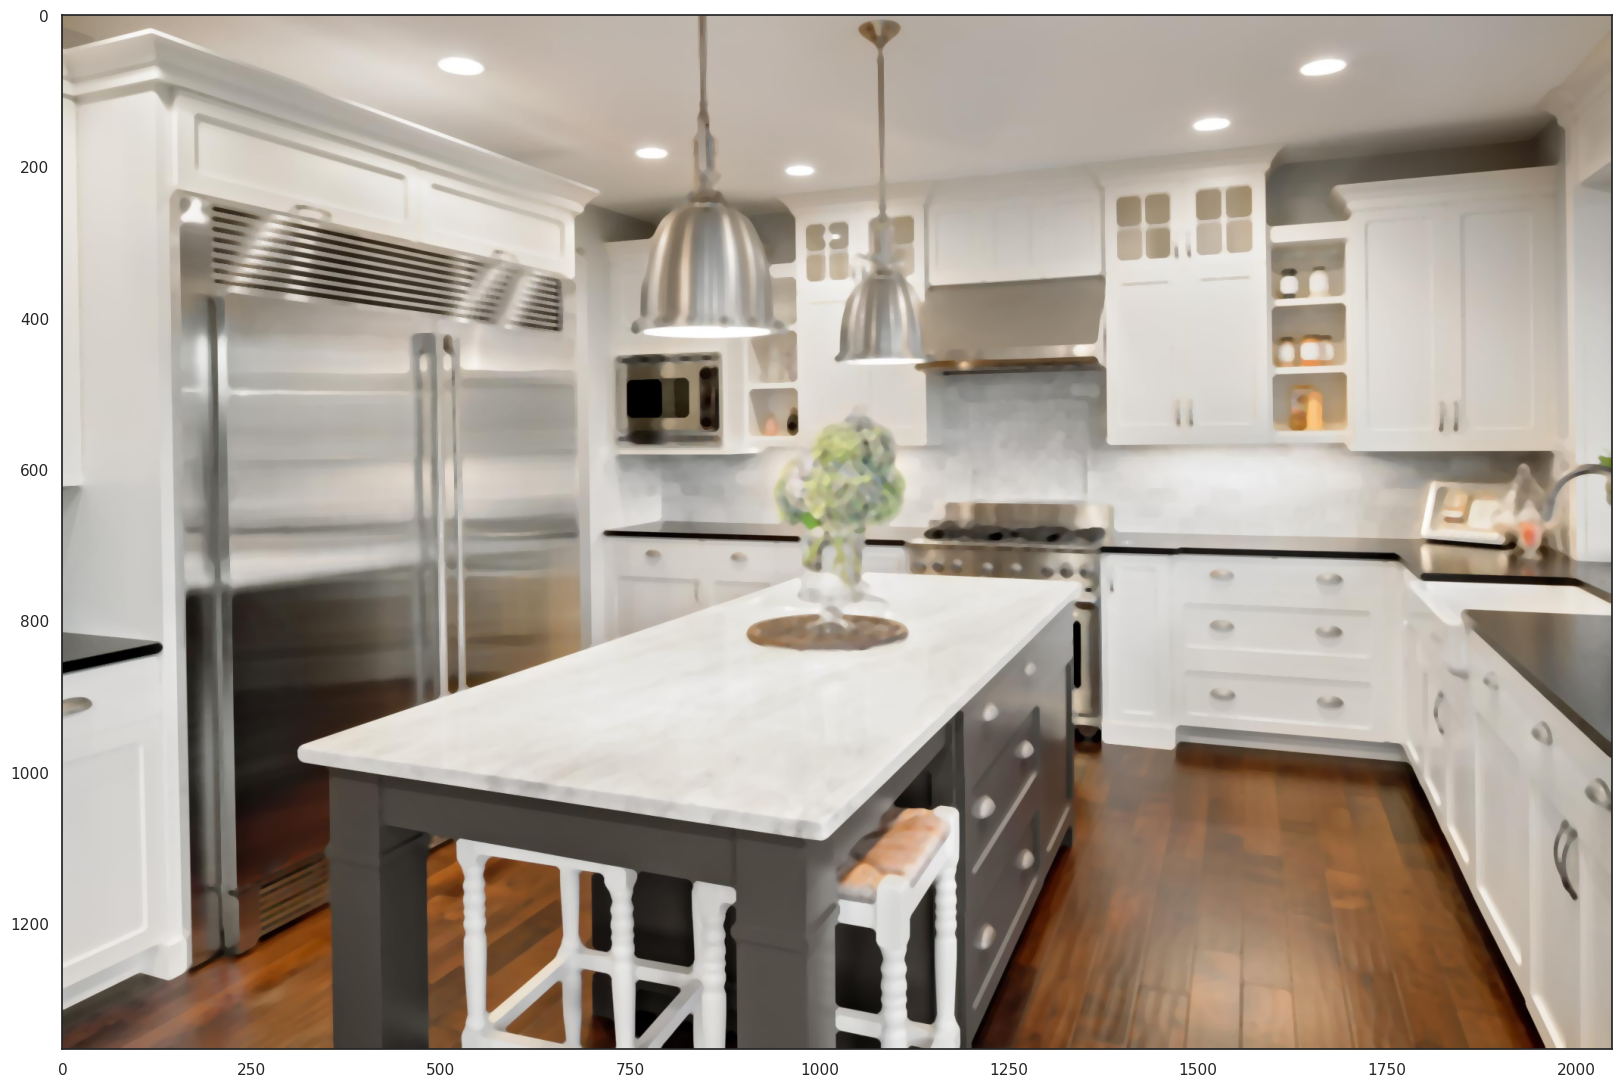

In [332]:
img = cv.medianBlur(img,7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [334]:
X = img.reshape((-1,3))
X = np.float32(X)

In [336]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=17.993700586349377, bin_seeding=True)

In [337]:
labeled = ms.labels_

In [344]:
cluster_int8 = np.uint8(ms.cluster_centers_)
result = np.zeros(X.shape, dtype=np.uint8)
labeled = ms.labels_
result = np.zeros(X.shape, dtype=np.uint8)

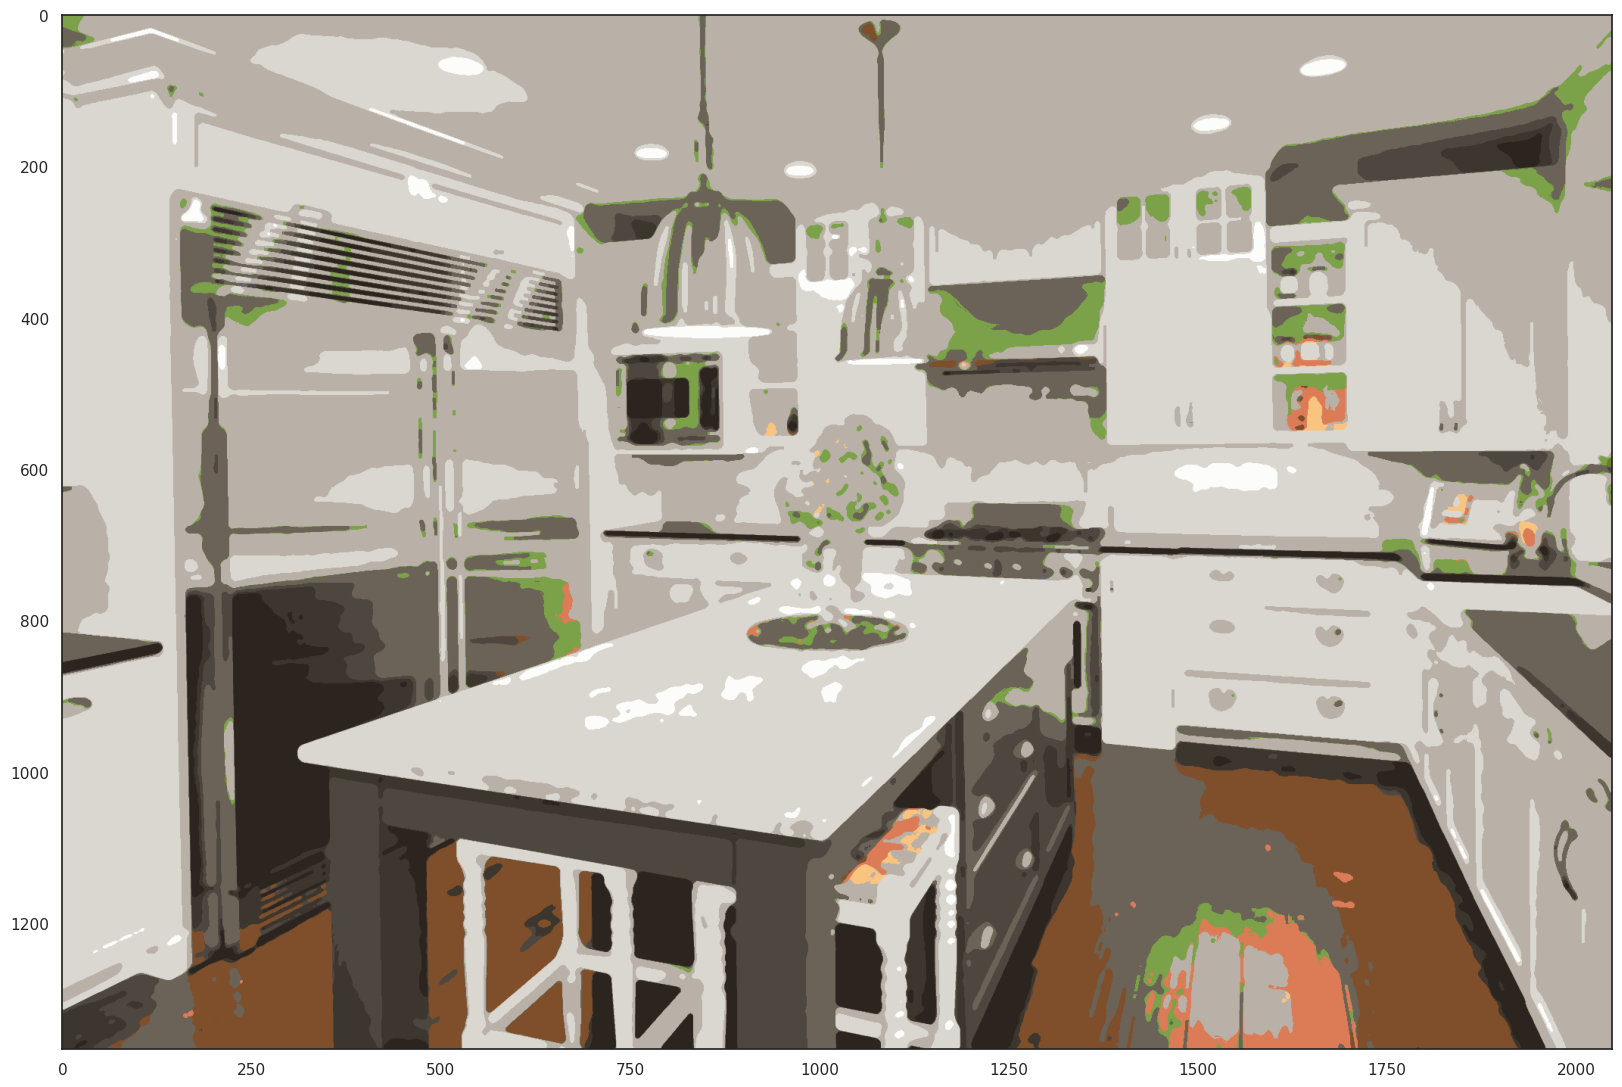

In [345]:
for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
    cluster_int8[label]
result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

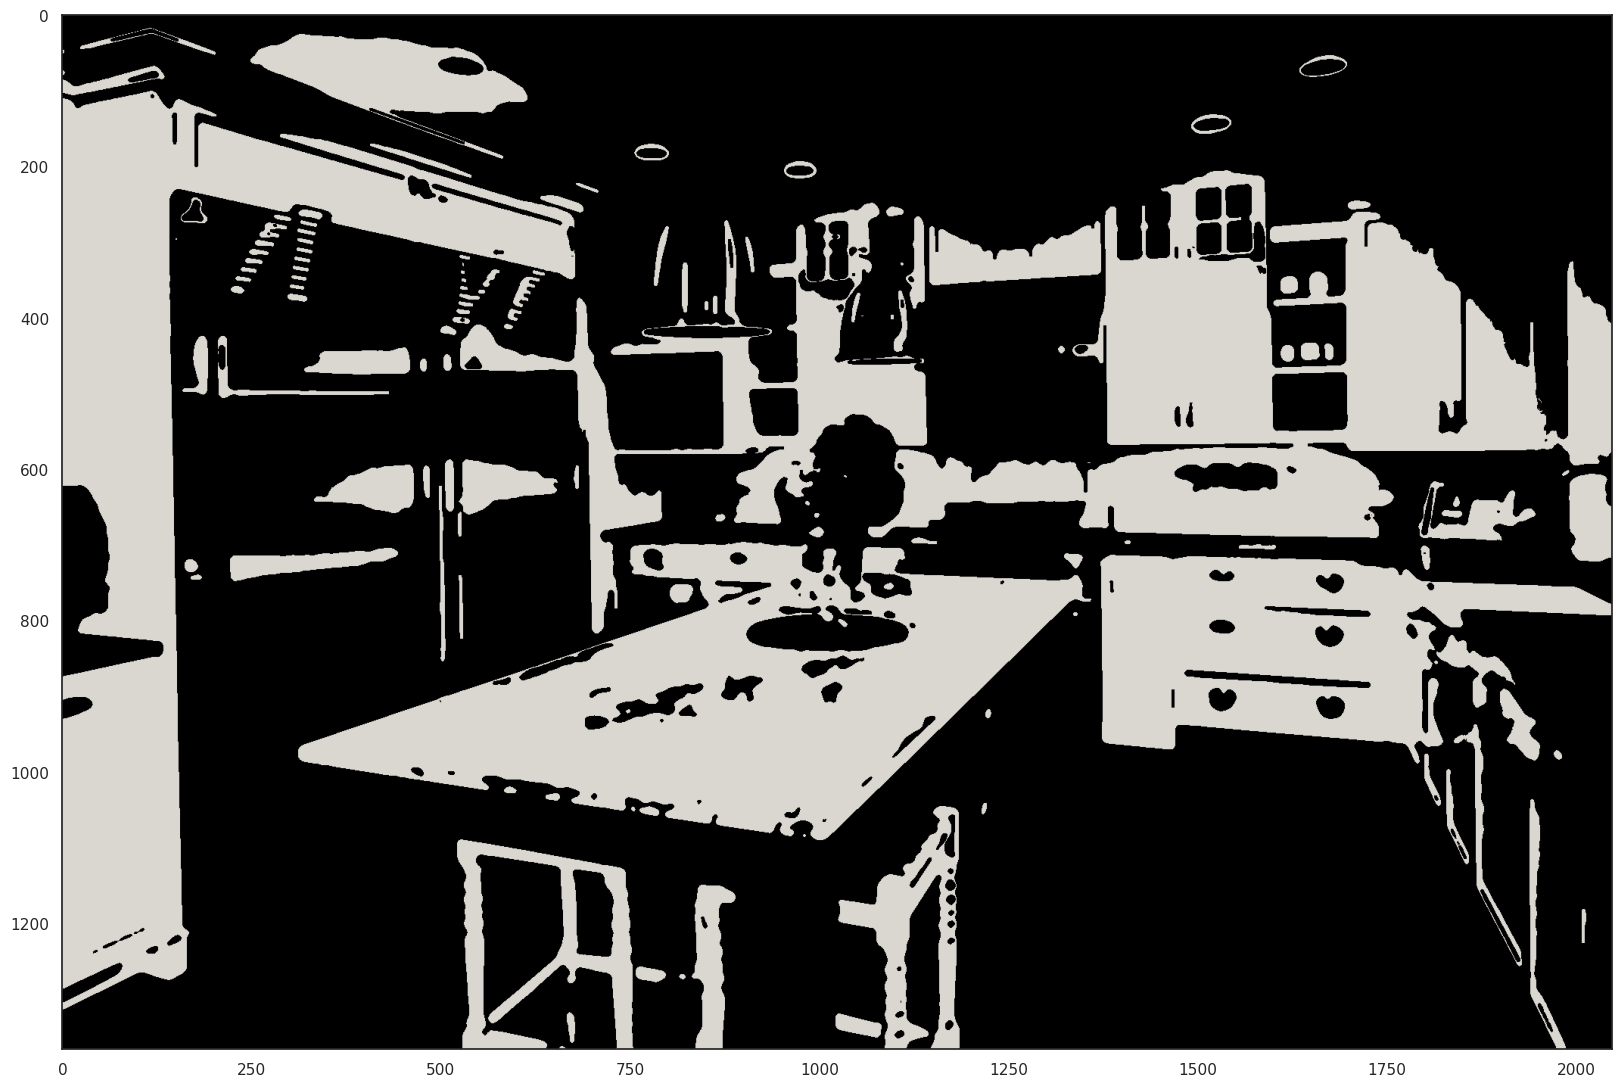

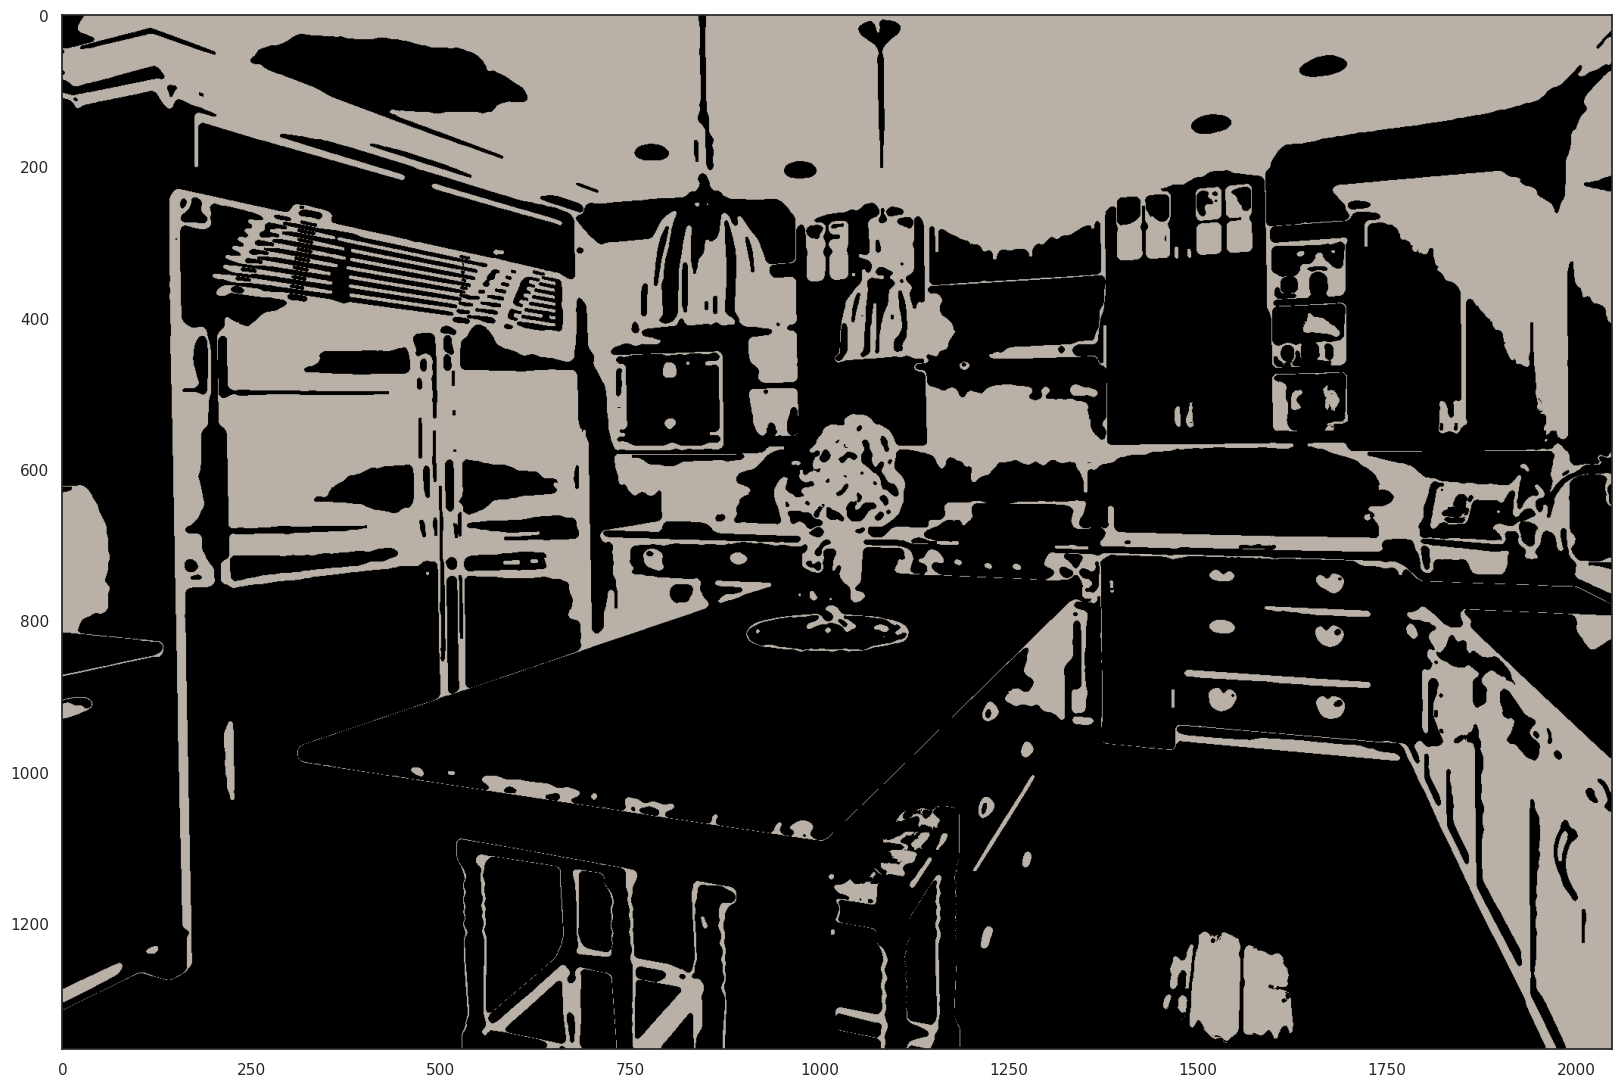

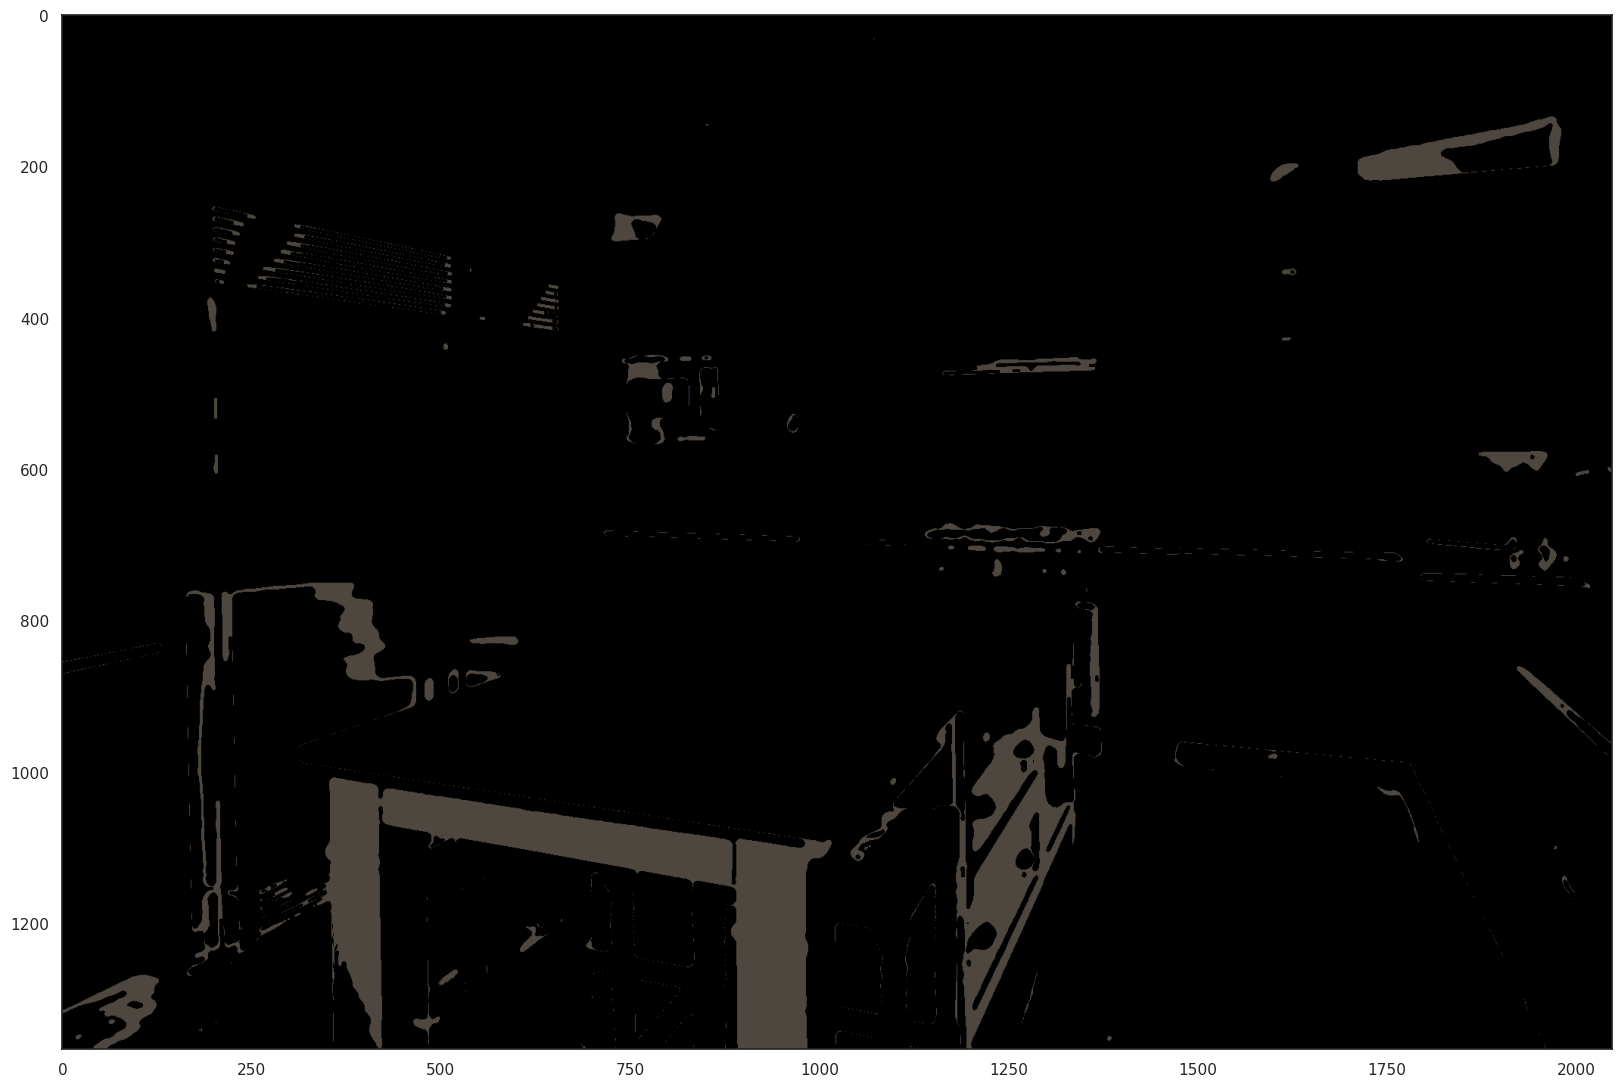

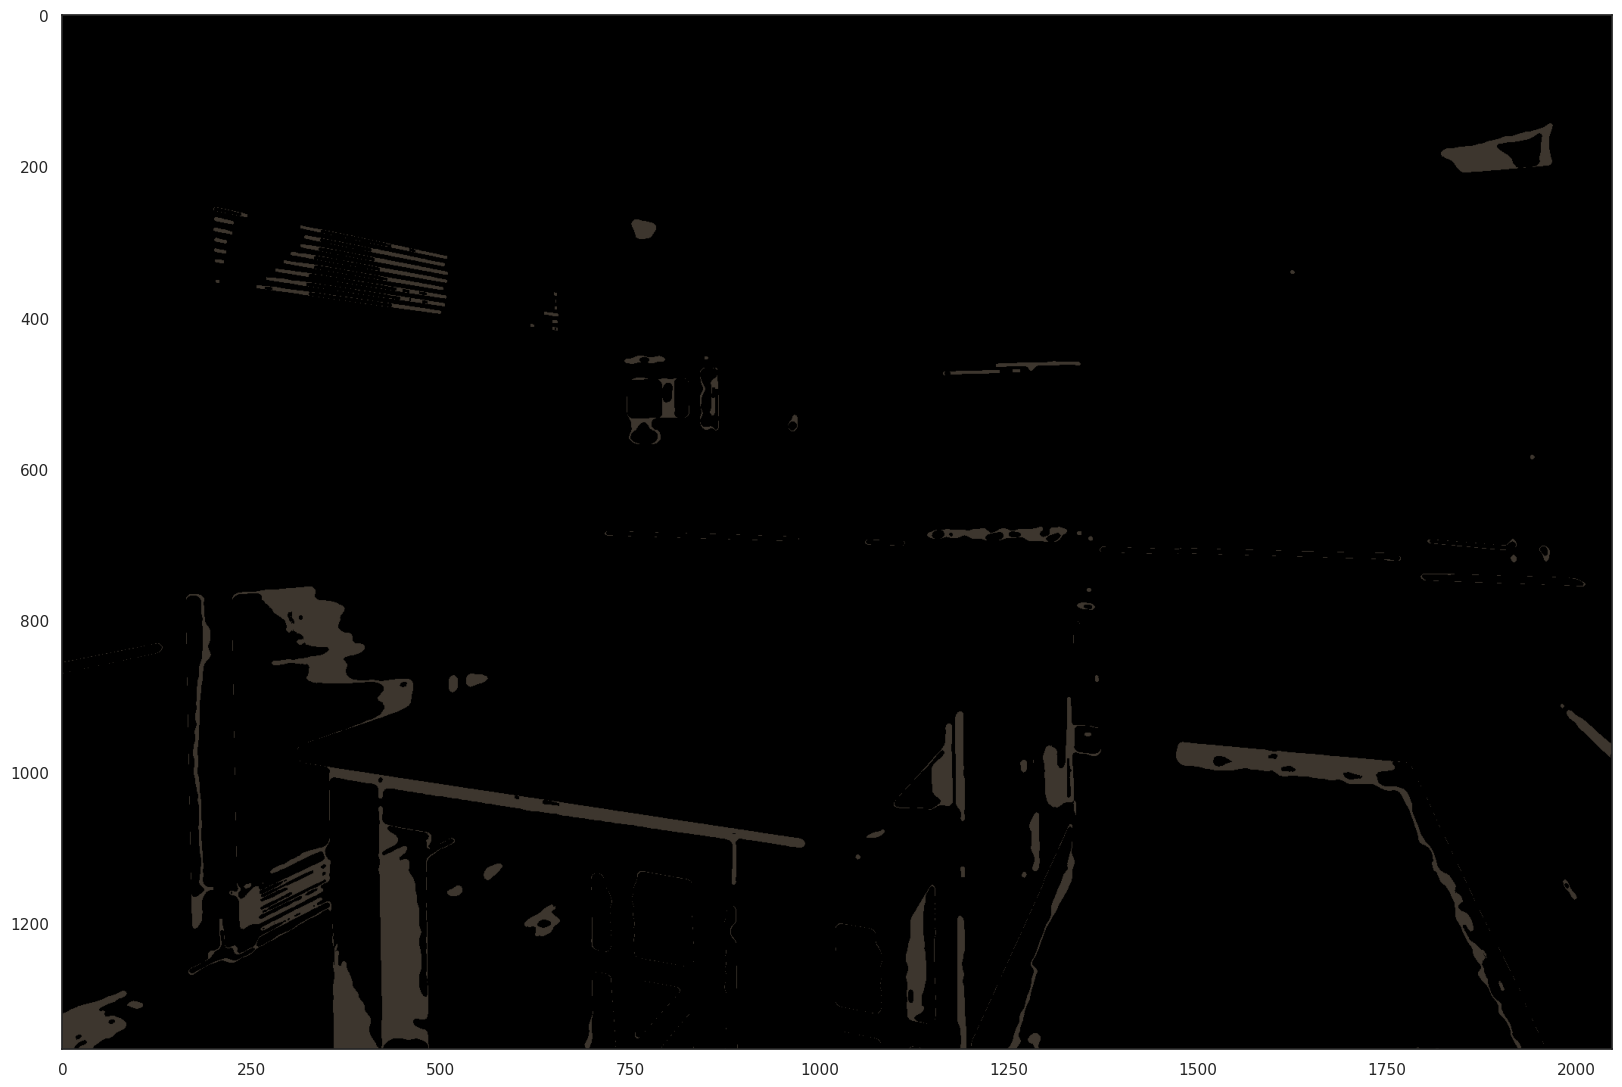

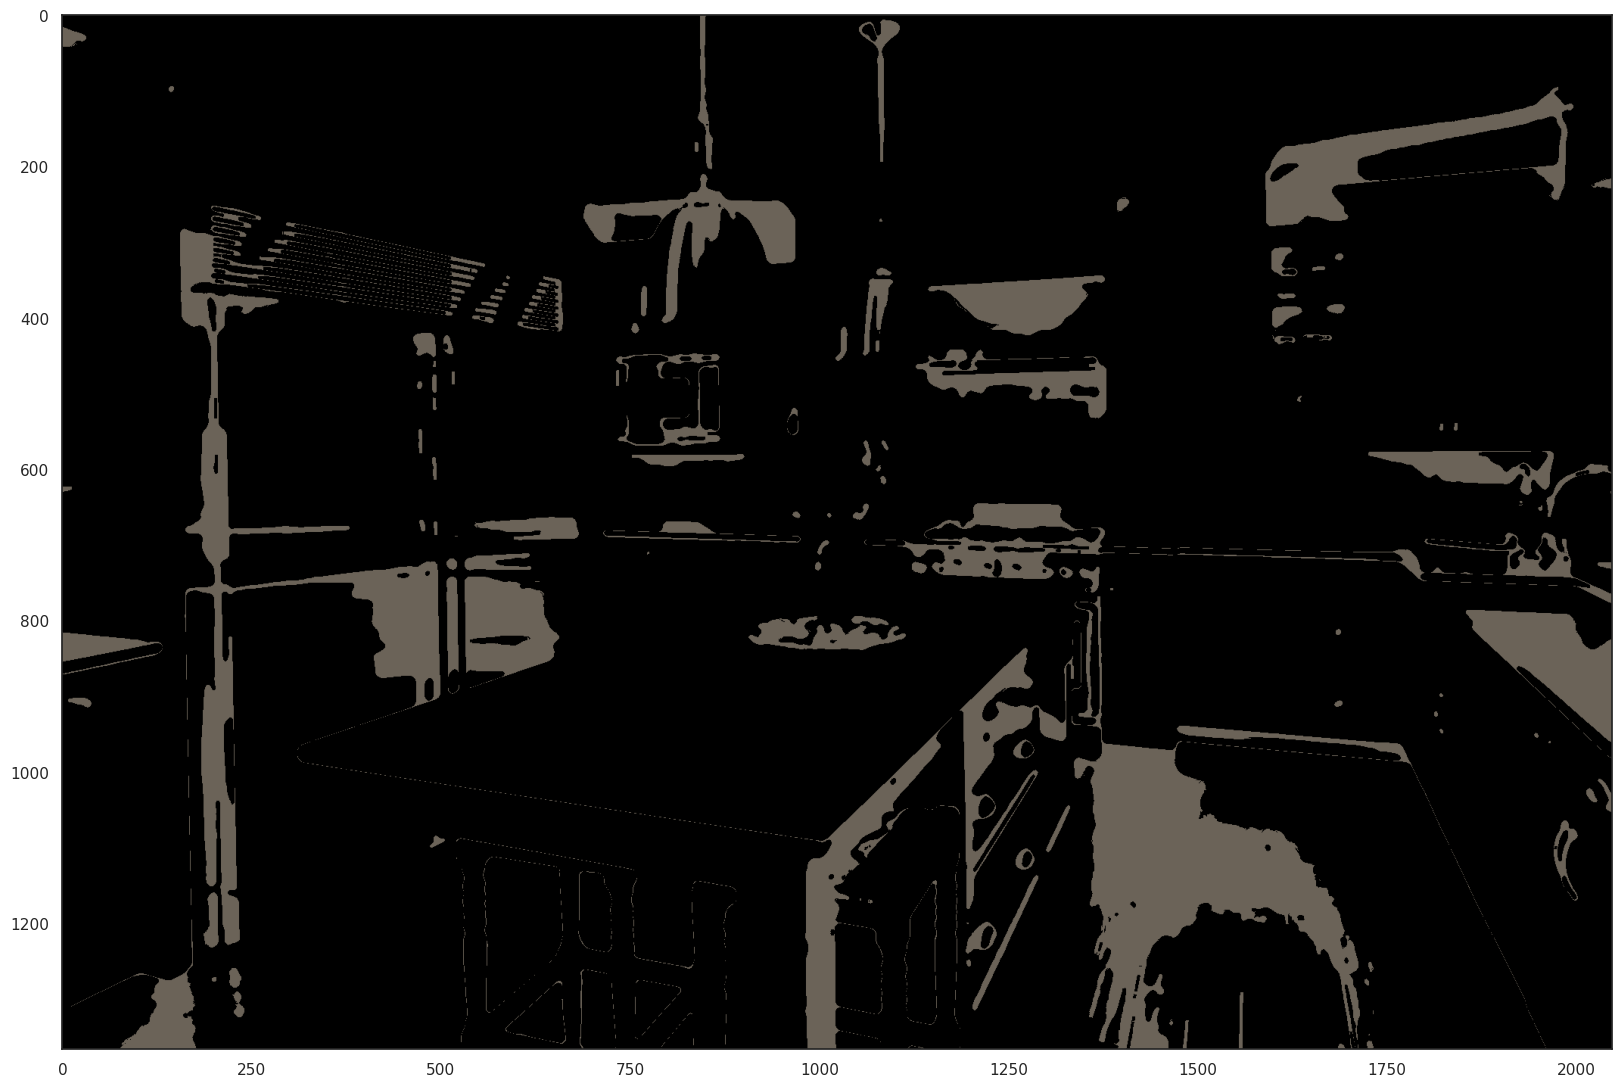

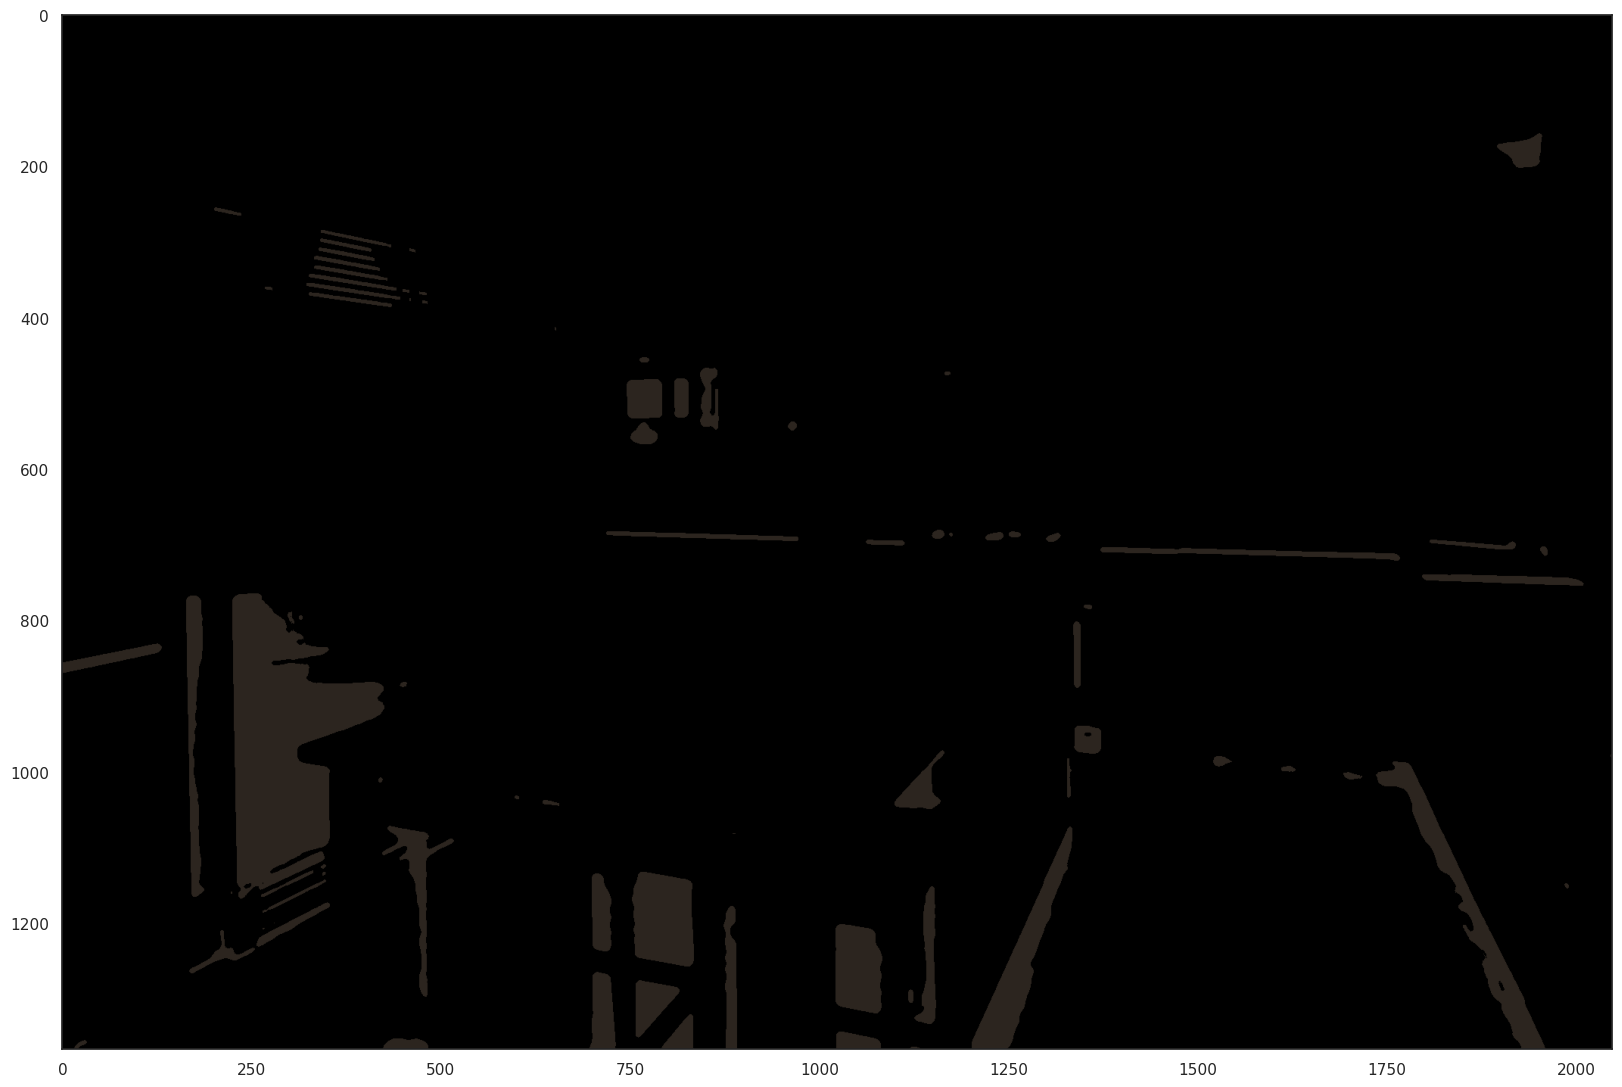

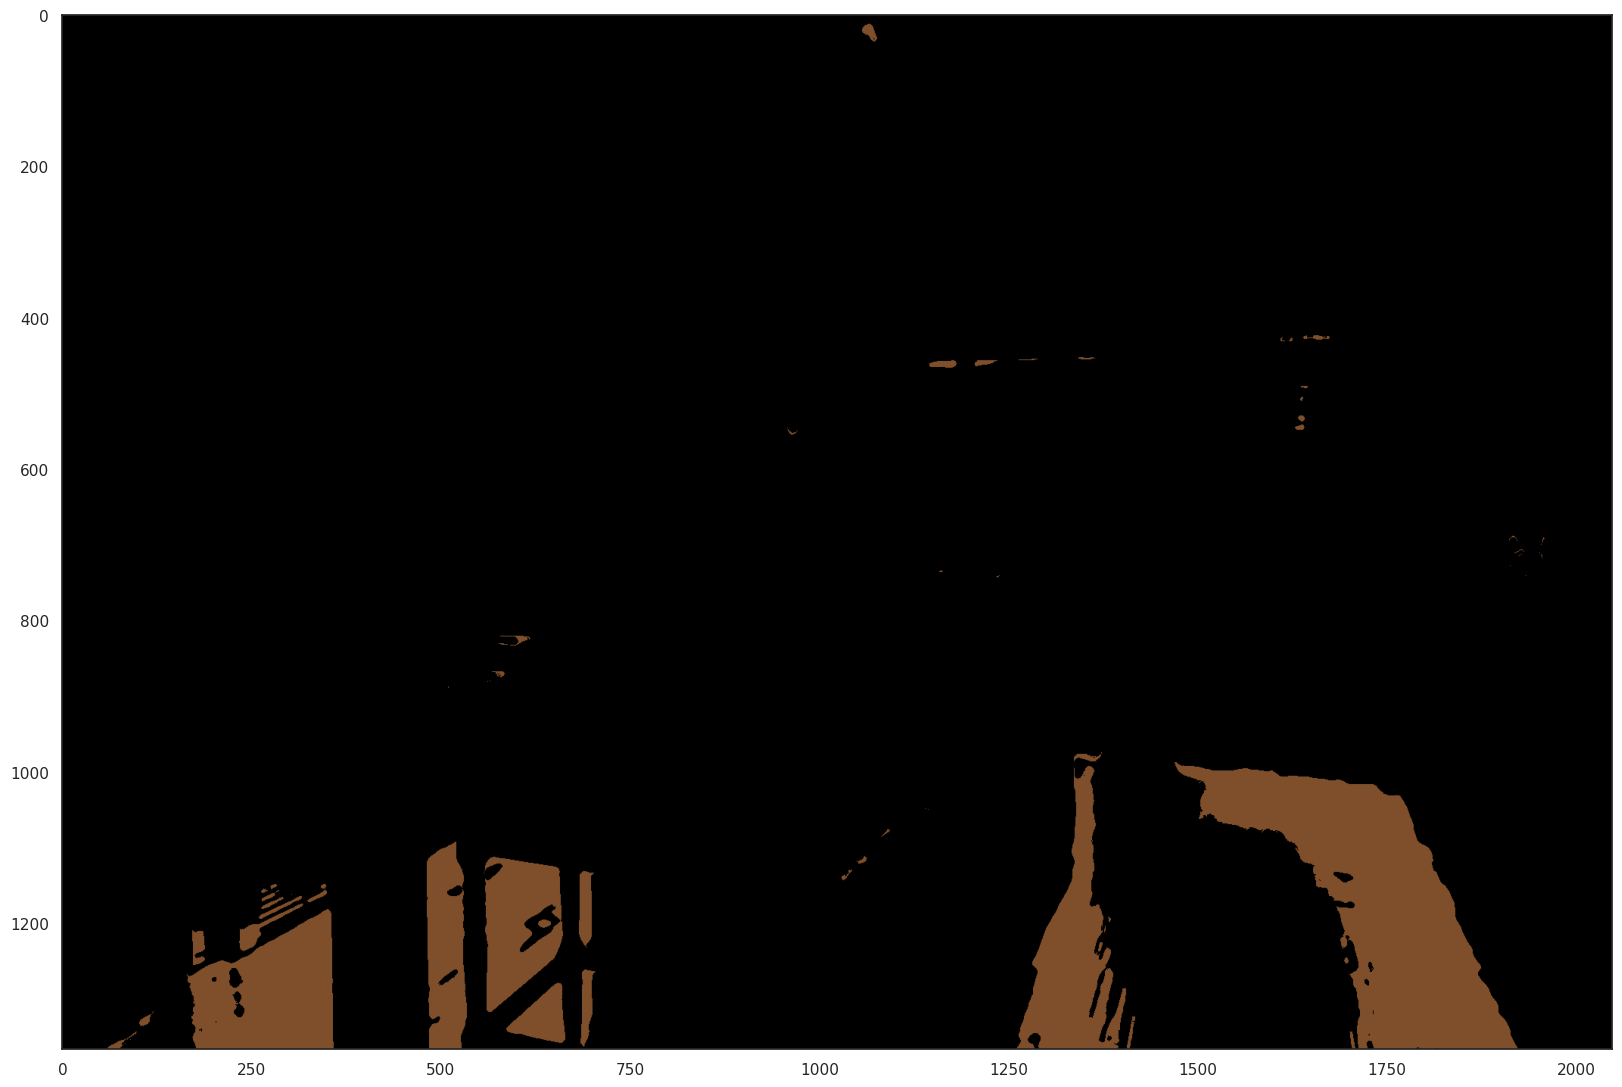

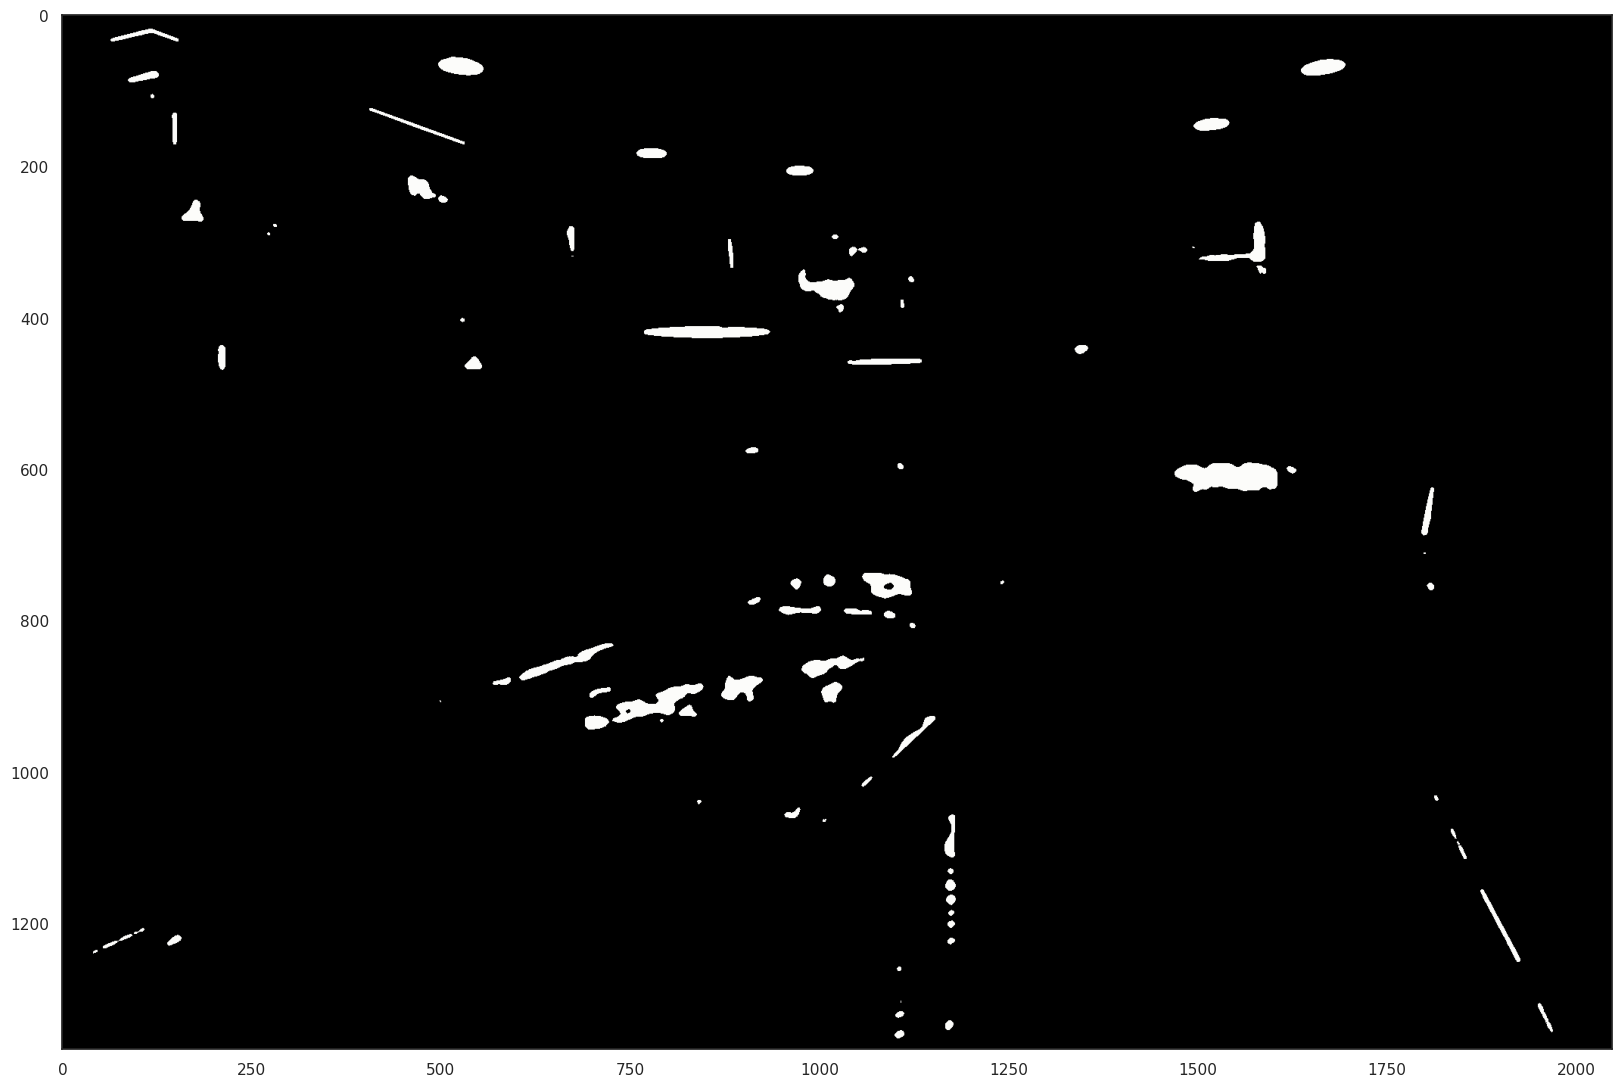

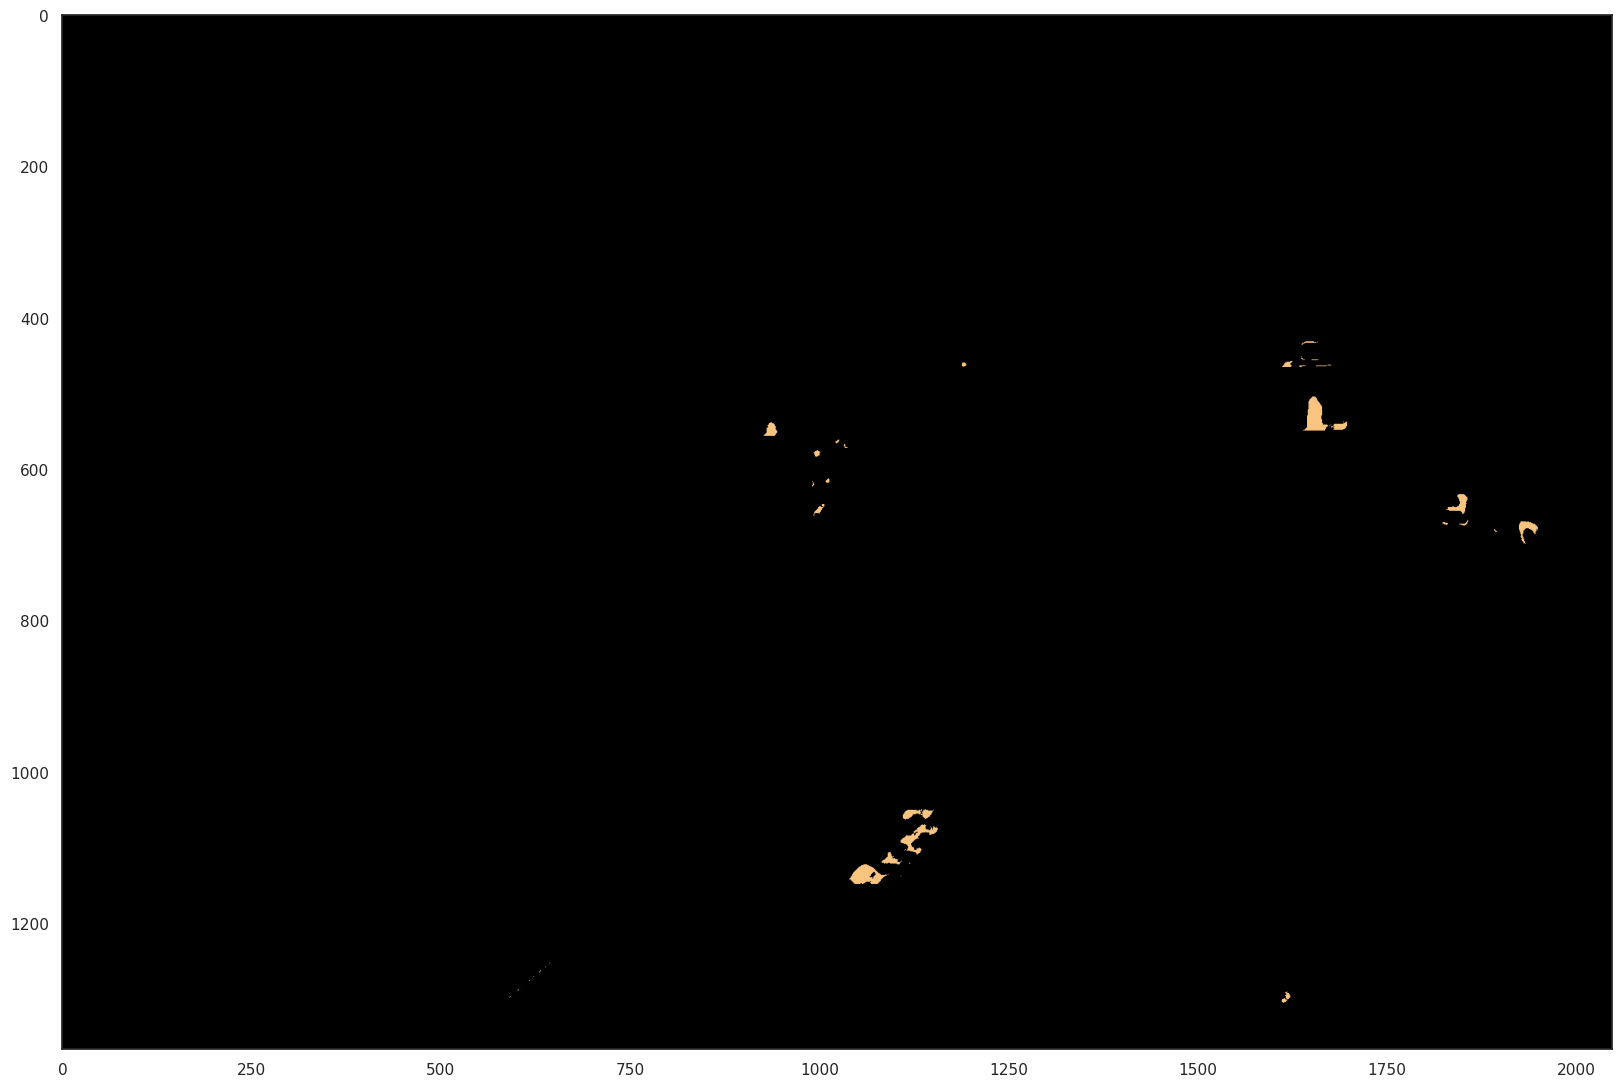

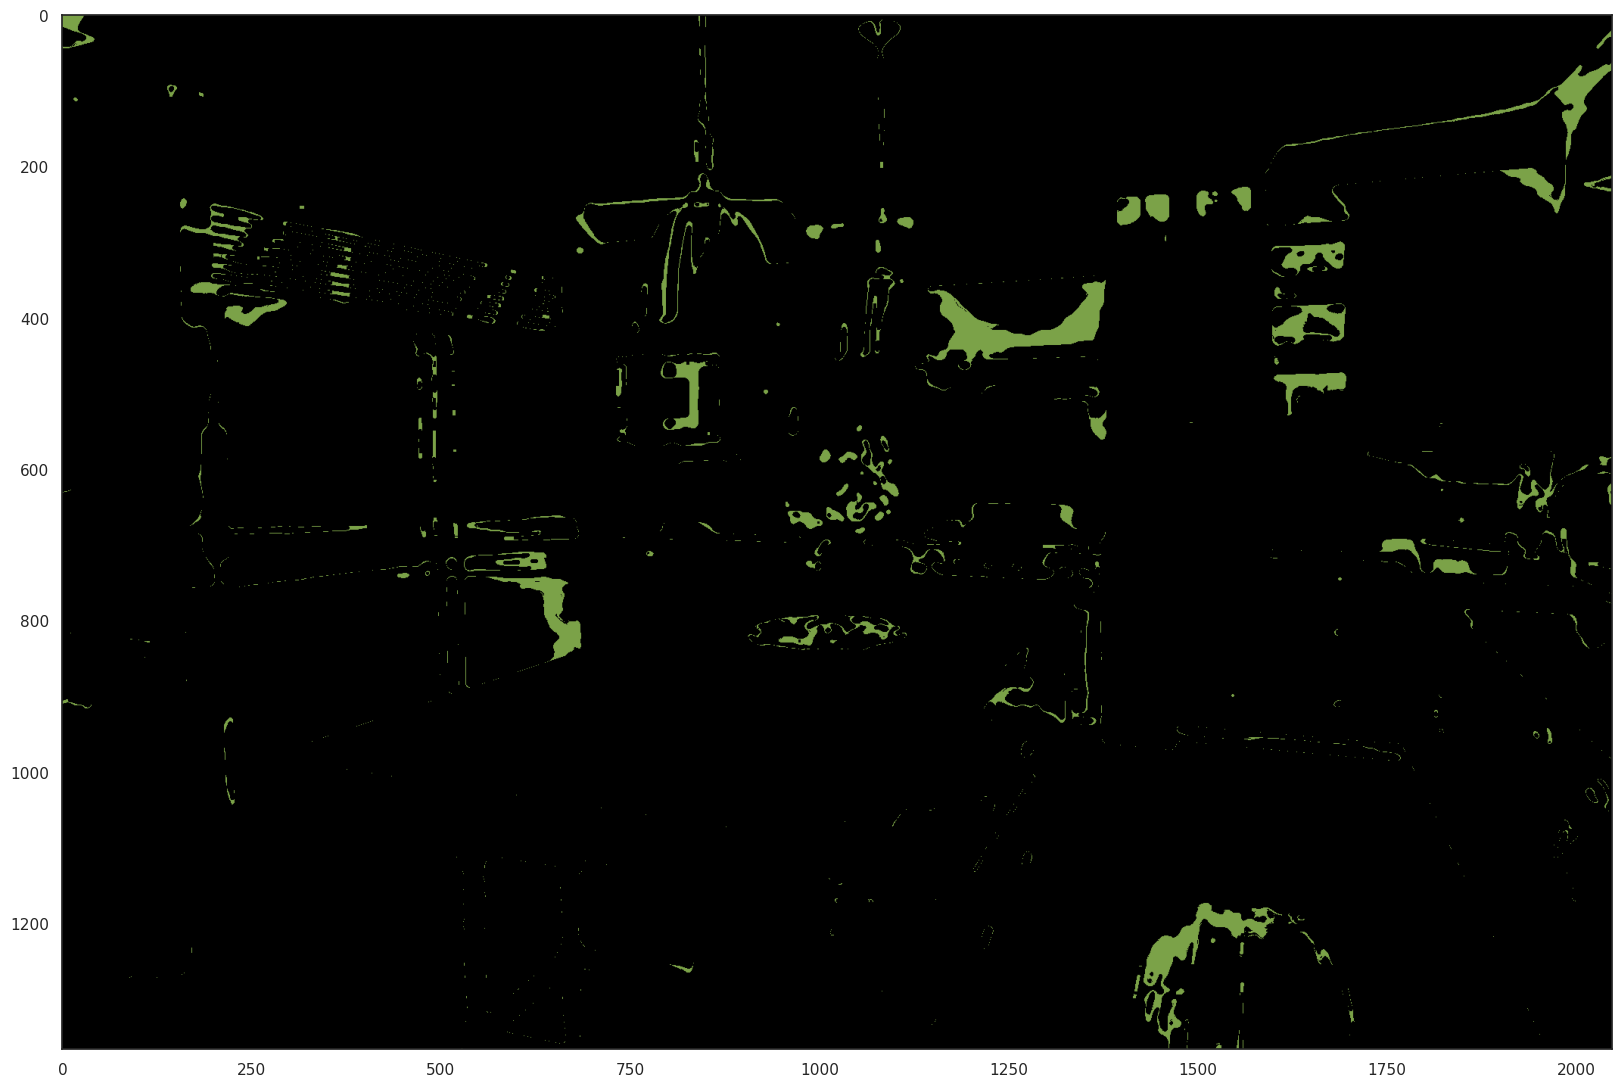

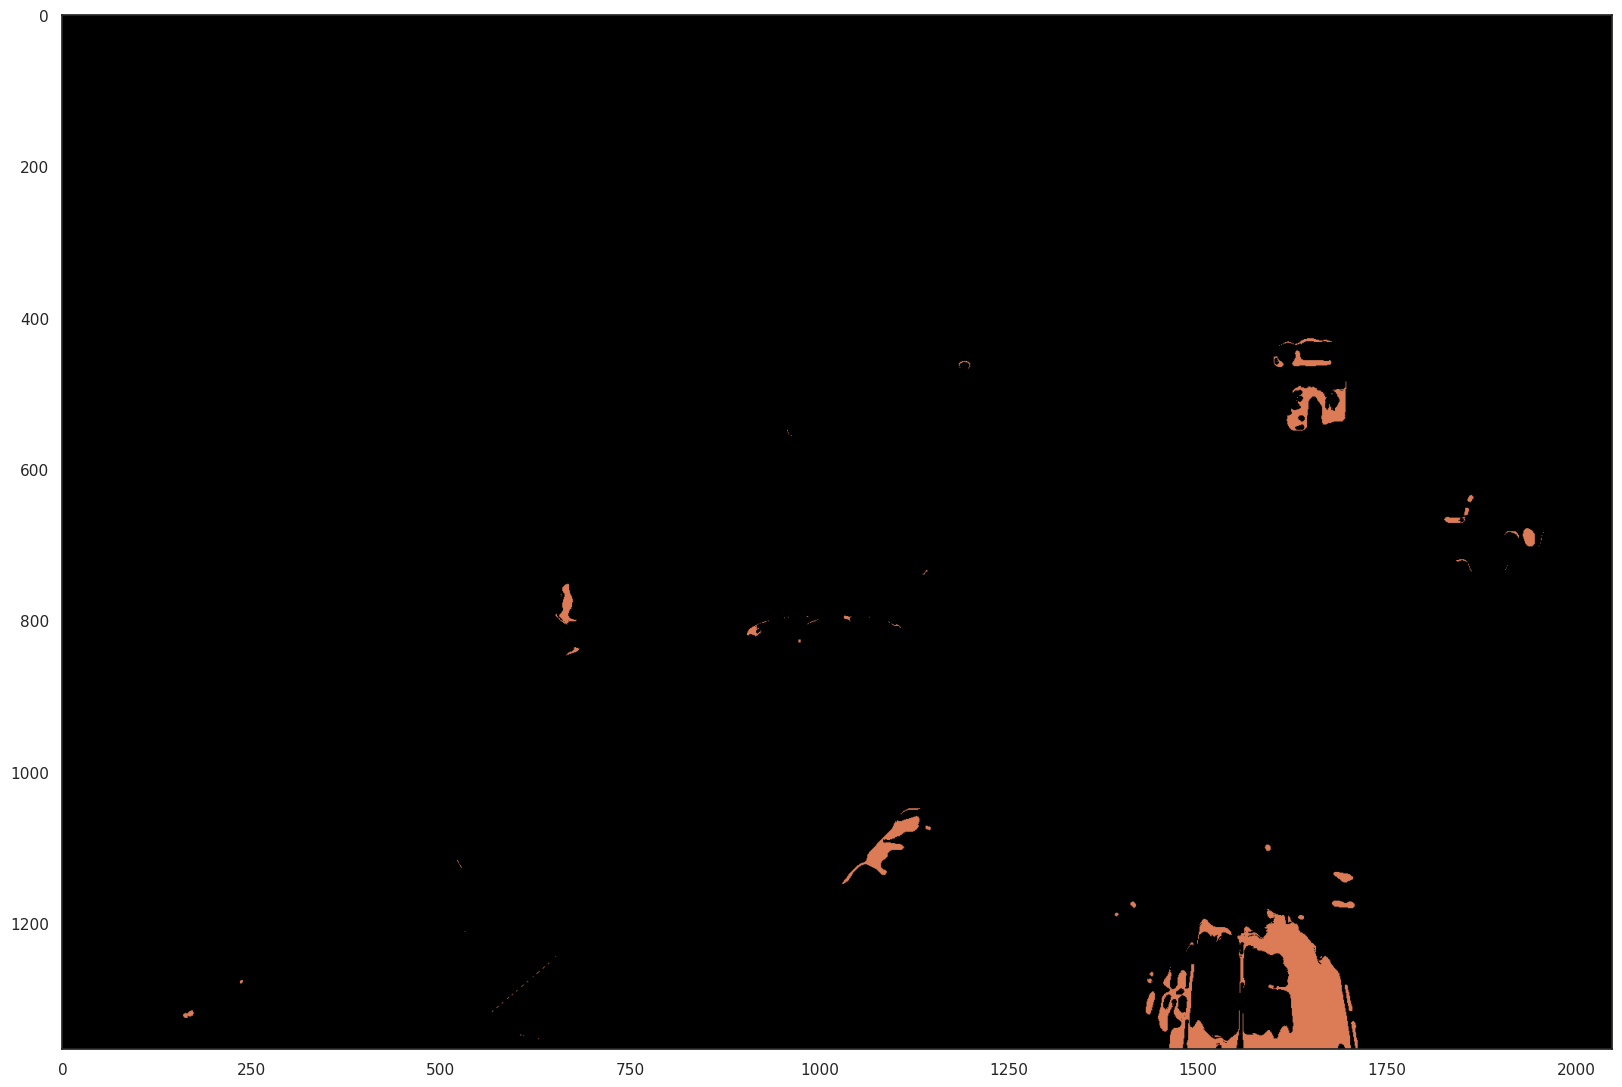

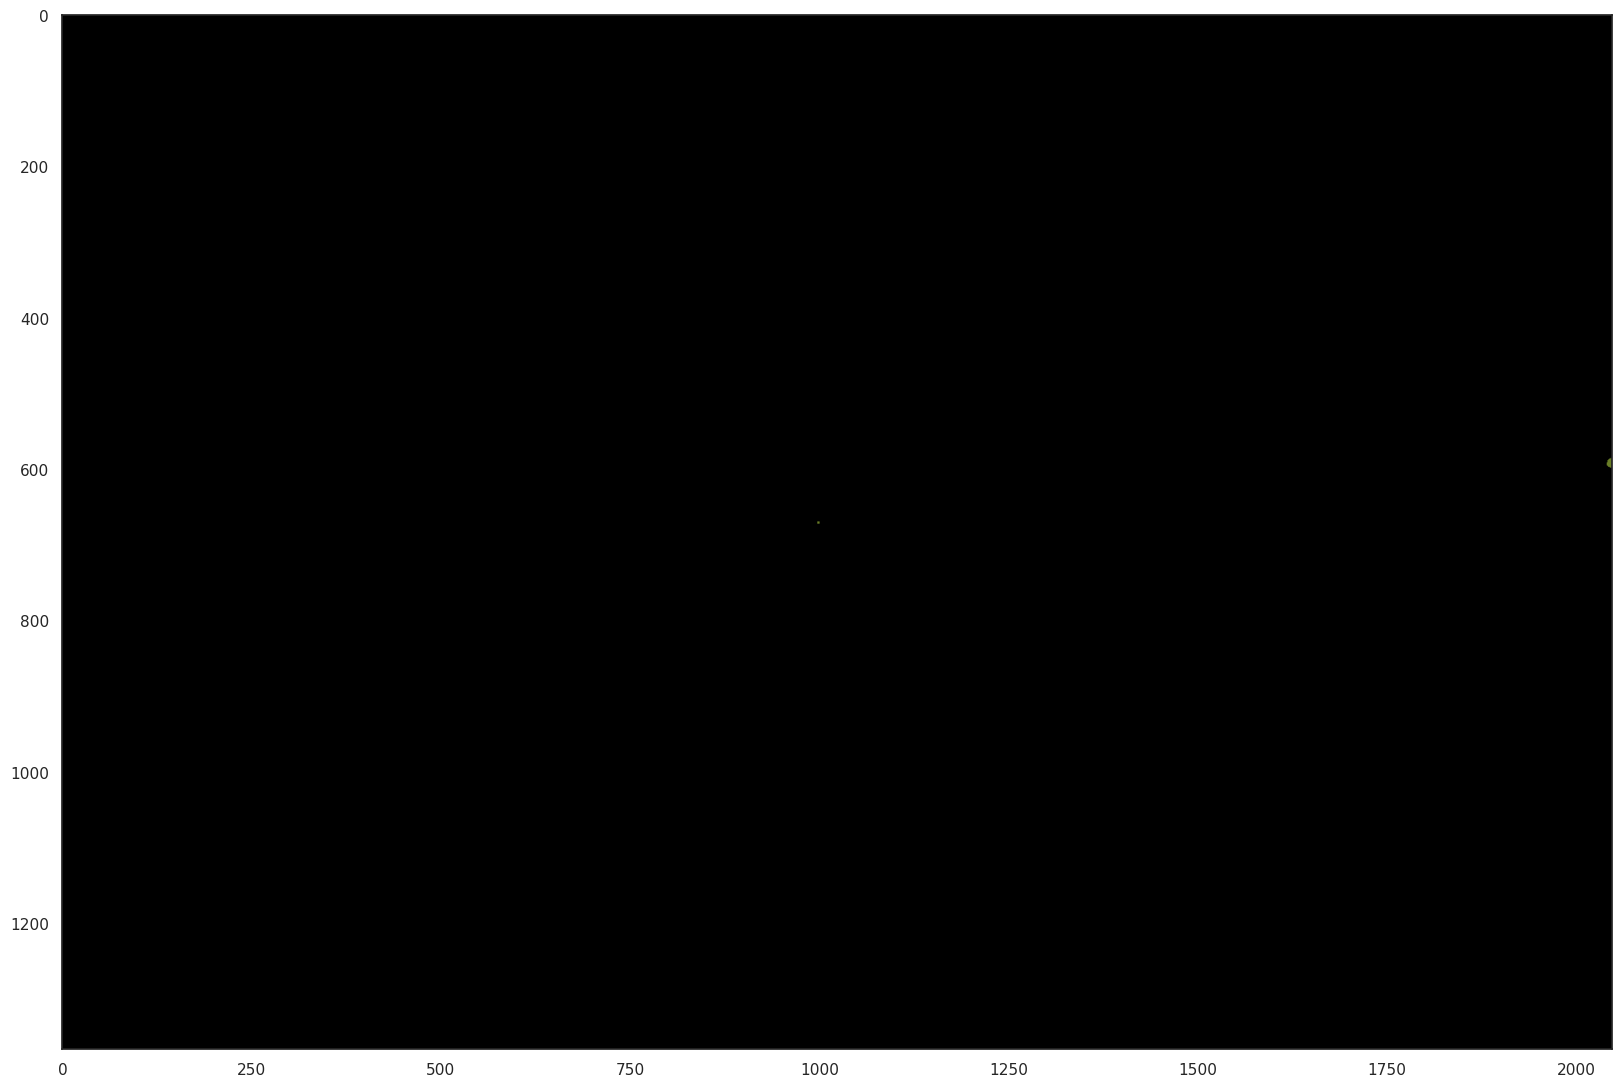

In [346]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

In [348]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv", overwrite=True)

df = pd.read_csv("titanic.csv")
df.head()

Saved to '.'


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [349]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])


In [350]:
df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1

In [351]:
df.head()

Survived  Pclass Sex   Age  SibSp  Parch     Fare
0         0       3   1  22.0      1      0   7.2500
1         1       1   0  38.0      1      0  71.2833
2         1       3   0  26.0      0      0   7.9250
3         1       1   0  35.0      1      0  53.1000
4         0       3   1  35.0      0      0   8.0500

In [352]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [353]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [354]:
X=df.drop(columns=['Survived'])


In [355]:
X=df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)


In [356]:
X.head()


Survived    Pclass       Sex       Age     SibSp     Parch      Fare
0 -0.788829  0.826913  0.737281 -0.592148  0.432550 -0.473408 -0.502163
1  1.266278 -1.565228 -1.354812  0.638430  0.432550 -0.473408  0.786404
2  1.266278  0.826913 -1.354812 -0.284503 -0.474279 -0.473408 -0.488580
3  1.266278 -1.565228 -1.354812  0.407697  0.432550 -0.473408  0.420494
4 -0.788829  0.826913  0.737281  0.407697 -0.474279 -0.473408 -0.486064

In [357]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=2.6395838673142618, bin_seeding=True)

In [358]:
X['cluster'] = ms.labels_

In [362]:
df['cluster'] = ms.labels_
df

Survived  Pclass Sex        Age  SibSp  Parch     Fare  cluster
0           0       3   1  22.000000      1      0   7.2500        0
1           1       1   0  38.000000      1      0  71.2833        0
2           1       3   0  26.000000      0      0   7.9250        0
3           1       1   0  35.000000      1      0  53.1000        0
4           0       3   1  35.000000      0      0   8.0500        0
..        ...     ...  ..        ...    ...    ...      ...      ...
886         0       2   1  27.000000      0      0  13.0000        0
887         1       1   0  19.000000      0      0  30.0000        0
888         0       3   0  29.699118      1      2  23.4500        0
889         1       1   1  26.000000      0      0  30.0000        0
890         0       3   1  32.000000      0      0   7.7500        0

[891 rows x 8 columns]

In [363]:
df.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

Survived    Pclass       Sex        Age     SibSp     Parch  \
cluster                                                                
5        1.000000  1.000000  0.666667  35.333333  0.000000  0.333333   
4        0.750000  1.000000  0.285714  27.822048  0.857143  1.250000   
0        0.381313  2.313131  0.676768  30.734477  0.285354  0.199495   
3        0.307692  2.846154  0.153846  38.692308  0.769231  4.230769   
1        0.260870  2.913043       0.5   8.745575  3.239130  1.543478   
2        0.000000  3.000000  0.571429  29.699118  8.000000  2.000000   
6        0.000000  1.000000       1.0  61.000000  0.500000  3.000000   

               Fare  
cluster              
5        512.329200  
4        195.894643  
0         23.992865  
3         29.377562  
1         30.968026  
2         69.550000  
6        188.137500